In [342]:
import pandas as pd
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.impute import KNNImputer
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform

In [343]:
import os
os.getcwd()

'C:\\Users\\MeyerJ\\OneDrive - Cedars-Sinai Health System\\Documents\\github\\ineurons\\python'

In [344]:
# Load your spreadsheet data into a Pandas DataFrame
df = pd.read_csv(r"..\\data\2025\dox-mzml.pg_matrix (1).tsv", sep='\t', index_col=2)
df
df.drop(['Protein.Group', 'Protein.Names', 'First.Protein.Description','N.Sequences','N.Proteotypic.Sequences'],axis=1, inplace=True)
df

,Y:\MS-data\2025\Jesus\dox\A1_20250325224911.mzML,Y:\MS-data\2025\Jesus\dox\A2.mzML,Y:\MS-data\2025\Jesus\dox\A3.mzML,Y:\MS-data\2025\Jesus\dox\A4.mzML,Y:\MS-data\2025\Jesus\dox\A5.mzML,Y:\MS-data\2025\Jesus\dox\B1.mzML,Y:\MS-data\2025\Jesus\dox\B2.mzML,Y:\MS-data\2025\Jesus\dox\B3.mzML,Y:\MS-data\2025\Jesus\dox\B4.mzML,Y:\MS-data\2025\Jesus\dox\B5.mzML,...,Y:\MS-data\2025\Jesus\dox\G1.mzML,Y:\MS-data\2025\Jesus\dox\G2.mzML,Y:\MS-data\2025\Jesus\dox\G3.mzML,Y:\MS-data\2025\Jesus\dox\G4.mzML,Y:\MS-data\2025\Jesus\dox\G5.mzML,Y:\MS-data\2025\Jesus\dox\H1.mzML,Y:\MS-data\2025\Jesus\dox\H2.mzML,Y:\MS-data\2025\Jesus\dox\H3.mzML,Y:\MS-data\2025\Jesus\dox\H4.mzML,Y:\MS-data\2025\Jesus\dox\H5.mzML
Genes,,,,,,,,,,,,,,,,,,,,,
NUDT4B,3.008760e+05,271631.00,376113.00,540274.0,351296.00,317962.00,290102.0,281447.0,341017.00,217988.0,...,210496.0,227153.00,153160.0,284194.0,1.704570e+05,175533.0,202248.00,240977.00,199635.00,218914.0
NBPF1;NBPF10;NBPF19;NBPF20;NBPF8;NBPF9,6.337670e+02,4427.68,1251.69,NaN,2640.96,3750.39,NaN,2113.0,1272.35,NaN,...,NaN,3350.62,NaN,NaN,5.718320e+02,NaN,4078.99,2827.11,3619.25,NaN
GATD3;GATD3B,1.133240e+07,14406700.00,10082500.00,15849200.0,10683900.00,10456300.00,11658200.0,11083200.0,10873100.00,11697400.0,...,13291700.0,12134200.00,12631100.0,14834400.0,1.419360e+07,13517800.0,13648200.00,14531700.00,16095700.00,15796100.0
PIGBOS1,1.394600e+05,194791.00,108791.00,NaN,178367.00,150447.00,NaN,NaN,210616.00,245852.0,...,137284.0,230486.00,225479.0,289233.0,3.942920e+05,208255.0,381987.00,320989.00,348923.00,281545.0
TMEM275,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,16772.4,14457.80,NaN,23313.9,1.337090e+04,NaN,NaN,NaN,14047.20,20005.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZHX2,4.634230e+05,324688.00,565386.00,646476.0,194226.00,266685.00,283692.0,265274.0,379711.00,415009.0,...,101632.0,96704.40,113519.0,142995.0,1.083400e+05,101857.0,NaN,141037.00,124151.00,99595.8
MORC2,2.344580e+06,2768510.00,1996840.00,2748110.0,2603180.00,2766930.00,2656800.0,2573480.0,2568800.00,2267720.0,...,2780680.0,2615400.00,2713140.0,3142120.0,2.551840e+06,2742200.0,2822970.00,2811240.00,2550620.00,2782980.0
IVNS1ABP,2.012130e+06,1704340.00,1874520.00,2295240.0,1184960.00,1374190.00,1462070.0,1553430.0,1629440.00,2045390.0,...,952904.0,908665.00,847274.0,915982.0,8.664810e+05,914912.0,826824.00,896257.00,627669.00,1089860.0


In [345]:
df.columns = [col.split("\\")[-1].split(".")[0] for col in df.columns]
df

,A1_20250325224911,A2,A3,A4,A5,B1,B2,B3,B4,B5,...,G1,G2,G3,G4,G5,H1,H2,H3,H4,H5
Genes,,,,,,,,,,,,,,,,,,,,,
NUDT4B,3.008760e+05,271631.00,376113.00,540274.0,351296.00,317962.00,290102.0,281447.0,341017.00,217988.0,...,210496.0,227153.00,153160.0,284194.0,1.704570e+05,175533.0,202248.00,240977.00,199635.00,218914.0
NBPF1;NBPF10;NBPF19;NBPF20;NBPF8;NBPF9,6.337670e+02,4427.68,1251.69,NaN,2640.96,3750.39,NaN,2113.0,1272.35,NaN,...,NaN,3350.62,NaN,NaN,5.718320e+02,NaN,4078.99,2827.11,3619.25,NaN
GATD3;GATD3B,1.133240e+07,14406700.00,10082500.00,15849200.0,10683900.00,10456300.00,11658200.0,11083200.0,10873100.00,11697400.0,...,13291700.0,12134200.00,12631100.0,14834400.0,1.419360e+07,13517800.0,13648200.00,14531700.00,16095700.00,15796100.0
PIGBOS1,1.394600e+05,194791.00,108791.00,NaN,178367.00,150447.00,NaN,NaN,210616.00,245852.0,...,137284.0,230486.00,225479.0,289233.0,3.942920e+05,208255.0,381987.00,320989.00,348923.00,281545.0
TMEM275,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,16772.4,14457.80,NaN,23313.9,1.337090e+04,NaN,NaN,NaN,14047.20,20005.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZHX2,4.634230e+05,324688.00,565386.00,646476.0,194226.00,266685.00,283692.0,265274.0,379711.00,415009.0,...,101632.0,96704.40,113519.0,142995.0,1.083400e+05,101857.0,NaN,141037.00,124151.00,99595.8
MORC2,2.344580e+06,2768510.00,1996840.00,2748110.0,2603180.00,2766930.00,2656800.0,2573480.0,2568800.00,2267720.0,...,2780680.0,2615400.00,2713140.0,3142120.0,2.551840e+06,2742200.0,2822970.00,2811240.00,2550620.00,2782980.0
IVNS1ABP,2.012130e+06,1704340.00,1874520.00,2295240.0,1184960.00,1374190.00,1462070.0,1553430.0,1629440.00,2045390.0,...,952904.0,908665.00,847274.0,915982.0,8.664810e+05,914912.0,826824.00,896257.00,627669.00,1089860.0


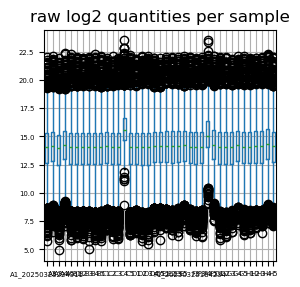

In [346]:
np.log(df).boxplot(fontsize=5)
#plt.axhline(df.count(axis=0), color='red', linestyle='--', label='Mean')
plt.title('raw log2 quantities per sample')
#plt.savefig(r"C:\Users\MunozestraJ\OneDrive - Cedars-Sinai Health System\Proteomics\Dox experiment/boxquant_raw.svg", bbox_inches='tight')
plt.show()

In [347]:
df.count(axis=0)

A1_20250325224911    9138
A2                   8849
A3                   9298
A4                   8351
A5                   9216
B1                   9353
B2                   9378
B3                   9244
B4                   9411
B5                   9404
C1                   9156
C2                   9415
C3                   9365
C4                   3592
C5                   9377
D1                   9254
D2                   9323
D3                   9346
D4                   9070
D5                   8900
E1                   8704
E2                   8835
E3                   8606
E5                   8426
F1_20250325184234    8769
F2                   8826
F3                   8669
F4                   5958
F5                   7751
G1                   8737
G2                   8879
G3                   8711
G4                   8375
G5                   8576
H1                   8757
H2                   8565
H3                   8737
H4                   8114
H5          

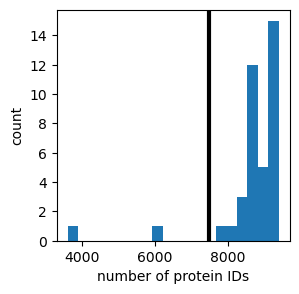

In [348]:
plt.rcParams['figure.figsize'] = 3,3
#plt.rcParams['axes.grid'] = False
df.count(axis=0).hist(bins=20, grid=False)
plt.axvline(x=7500, color='black', linewidth=3)
plt.xlabel('number of protein IDs')
plt.ylabel('count')
#plt.savefig(r"C:\Users\MunozestraJ\OneDrive - Cedars-Sinai Health System\Proteomics\Dox experiment/proteins_per_condition.svg", bbox_inches='tight')
plt.show()

In [349]:
df.T.index

Index(['A1_20250325224911', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4',
       'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1',
       'E2', 'E3', 'E5', 'F1_20250325184234', 'F2', 'F3', 'F4', 'F5', 'G1',
       'G2', 'G3', 'G4', 'G5', 'H1', 'H2', 'H3', 'H4', 'H5'],
      dtype='object')

In [350]:
dropthese = df.T.index[df.count()<7500]
dropthese

Index(['C4', 'F4'], dtype='object')

In [351]:
df = df.drop(dropthese, axis=1)

In [352]:
df.count()

A1_20250325224911    9138
A2                   8849
A3                   9298
A4                   8351
A5                   9216
B1                   9353
B2                   9378
B3                   9244
B4                   9411
B5                   9404
C1                   9156
C2                   9415
C3                   9365
C5                   9377
D1                   9254
D2                   9323
D3                   9346
D4                   9070
D5                   8900
E1                   8704
E2                   8835
E3                   8606
E5                   8426
F1_20250325184234    8769
F2                   8826
F3                   8669
F5                   7751
G1                   8737
G2                   8879
G3                   8711
G4                   8375
G5                   8576
H1                   8757
H2                   8565
H3                   8737
H4                   8114
H5                   8609
dtype: int64

In [353]:
# Assuming your DataFrame is named 'df'
column_sums = df.sum(axis=0)  # Calculate the sum of each column

# Divide each element by the corresponding column sum
df_normalized = df.div(column_sums, axis=1)
df_normalized

,A1_20250325224911,A2,A3,A4,A5,B1,B2,B3,B4,B5,...,G1,G2,G3,G4,G5,H1,H2,H3,H4,H5
Genes,,,,,,,,,,,,,,,,,,,,,
NUDT4B,3.240442e-06,2.581984e-06,4.647683e-06,0.000005,3.228024e-06,3.072866e-06,2.793175e-06,2.792574e-06,3.182371e-06,2.127471e-06,...,1.973233e-06,2.146734e-06,1.525413e-06,2.488230e-06,1.606919e-06,1.670601e-06,1.899179e-06,2.181306e-06,1.470802e-06,1.987760e-06
NBPF1;NBPF10;NBPF19;NBPF20;NBPF8;NBPF9,6.825685e-09,4.208723e-08,1.546732e-08,NaN,2.426752e-08,3.624473e-08,NaN,2.096561e-08,1.187357e-08,NaN,...,NaN,3.166540e-08,NaN,NaN,5.390730e-09,NaN,3.830314e-08,2.559080e-08,2.666466e-08,NaN
GATD3;GATD3B,1.220502e-04,1.369426e-04,1.245909e-04,0.000157,9.817330e-05,1.010524e-04,1.122481e-04,1.099698e-04,1.014678e-04,1.141617e-04,...,1.245992e-04,1.146756e-04,1.258007e-04,1.298810e-04,1.338048e-04,1.286530e-04,1.281614e-04,1.315399e-04,1.185843e-04,1.434301e-04
PIGBOS1,1.501987e-06,1.851582e-06,1.344346e-06,NaN,1.638997e-06,1.453958e-06,NaN,NaN,1.965469e-06,2.399412e-06,...,1.286929e-06,2.178233e-06,2.245681e-06,2.532349e-06,3.717039e-06,1.982026e-06,3.586991e-06,2.905569e-06,2.570674e-06,2.556455e-06
TMEM275,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.572280e-07,1.366350e-07,NaN,2.041224e-07,1.260491e-07,NaN,NaN,NaN,1.034921e-07,1.816537e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZHX2,4.991077e-06,3.086316e-06,6.986558e-06,0.000006,1.784723e-06,2.577312e-06,2.731458e-06,2.632102e-06,3.543463e-06,4.050313e-06,...,9.527195e-07,9.139156e-07,1.130604e-06,1.251977e-06,1.021334e-06,9.694039e-07,NaN,1.276657e-06,9.146768e-07,9.043393e-07
MORC2,2.525118e-05,2.631602e-05,2.467524e-05,0.000027,2.392036e-05,2.674032e-05,2.558034e-05,2.553459e-05,2.397204e-05,2.213199e-05,...,2.606667e-05,2.471713e-05,2.702180e-05,2.751049e-05,2.405651e-05,2.609835e-05,2.650867e-05,2.544714e-05,1.879158e-05,2.526972e-05
IVNS1ABP,2.167069e-05,1.620057e-05,2.316372e-05,0.000023,1.088848e-05,1.328052e-05,1.407718e-05,1.541345e-05,1.520594e-05,1.996214e-05,...,8.932720e-06,8.587439e-06,8.438513e-06,8.019782e-06,8.168422e-06,8.707495e-06,7.764166e-06,8.112854e-06,4.624322e-06,9.896032e-06


In [354]:
# Handle missing values (e.g., impute with mean or median), imputation may contain very small numbers
# Create a KNN imputer object
imputer = KNNImputer(n_neighbors=5)  # Adjust n_neighbors as needed

# Impute missing values using KNN
df_imputed = imputer.fit_transform(df_normalized)

# Create a new DataFrame with imputed values
df_imputed = pd.DataFrame(df_imputed, columns=df.columns, index= df.index)
df_imputed*10e6

,A1_20250325224911,A2,A3,A4,A5,B1,B2,B3,B4,B5,...,G1,G2,G3,G4,G5,H1,H2,H3,H4,H5
Genes,,,,,,,,,,,,,,,,,,,,,
NUDT4B,32.404415,25.819837,46.476835,53.446932,32.280242,30.728661,27.931753,27.925742,31.823709,21.274710,...,19.732333,21.467345,15.254128,24.882301,16.069188,16.706008,18.991793,21.813064,14.708017,19.877599
NBPF1;NBPF10;NBPF19;NBPF20;NBPF8;NBPF9,0.068257,0.420872,0.154673,0.355072,0.242675,0.362447,0.264736,0.209656,0.118736,0.120313,...,0.212375,0.316654,0.209489,0.293937,0.053907,0.214132,0.383031,0.255908,0.266647,0.328676
GATD3;GATD3B,1220.502121,1369.426340,1245.909310,1567.891690,981.732992,1010.523591,1122.480941,1099.697570,1014.677784,1141.616955,...,1245.991609,1146.755943,1258.007390,1298.809983,1338.047911,1286.530001,1281.613599,1315.398996,1185.843292,1434.300888
PIGBOS1,15.019875,18.515824,13.443463,21.826391,16.389967,14.539583,20.028749,26.996051,19.654687,23.994119,...,12.869288,21.782333,22.456813,25.323485,37.170386,19.820260,35.869912,29.055693,25.706741,25.564554
TMEM275,0.419337,0.375674,0.542128,0.398746,0.193224,0.255217,0.234749,0.222062,0.254141,0.404640,...,1.572280,1.366350,0.935646,2.041224,1.260491,0.712907,1.133143,0.578889,1.034921,1.816537
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZHX2,49.910765,30.863161,69.865577,63.953029,17.847235,25.773121,27.314582,26.321024,35.434634,40.503130,...,9.527195,9.139156,11.306042,12.519774,10.213343,9.694039,8.929886,12.766567,9.146768,9.043393
MORC2,252.511812,263.160232,246.752447,271.858443,239.203633,267.403196,255.803414,255.345902,239.720438,221.319917,...,260.666728,247.171259,270.217967,275.104947,240.565056,260.983486,265.086733,254.471416,187.915755,252.697228
IVNS1ABP,216.706870,162.005740,231.637185,227.058004,108.884801,132.805238,140.771792,154.134473,152.059355,199.621446,...,89.327203,85.874387,84.385125,80.197822,81.684216,87.074948,77.641658,81.128537,46.243225,98.960324


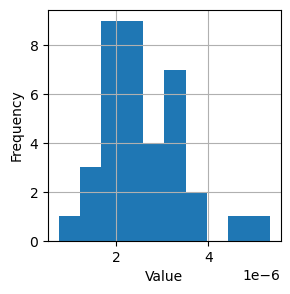

In [355]:
#[0,:] all columns in the first row, what type of distribution 
df_imputed.iloc[0,:].hist()
# Set the x and y labels
plt.xlabel('Value')  # Label for x-axis
plt.ylabel('Frequency')  # Label for y-axis
plt.show()

In [356]:
df_imputed = np.log(df_imputed*10e6) #np.log (...) applies the natural algorithm (log base e) to all values, improve linearity for PCA
#make data more normally distributed and  reduce the effects of outliers 

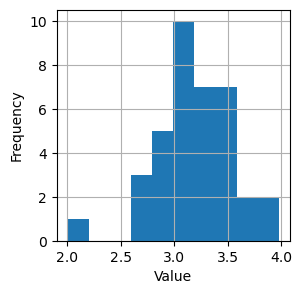

In [357]:
df_imputed.iloc[0,:].hist()
plt.xlabel('Value')  # Label for x-axis
plt.ylabel('Frequency')  # Label for y-axis
plt.show()

In [358]:
# Extract group labels from column names
# Jessi code=group_labels = [int(col[-1]) for col in df.columns]
#My group_labels are in the firts row 
group_labels = [col[0] for col in df.columns]
group_labels

['A',
 'A',
 'A',
 'A',
 'A',
 'B',
 'B',
 'B',
 'B',
 'B',
 'C',
 'C',
 'C',
 'C',
 'D',
 'D',
 'D',
 'D',
 'D',
 'E',
 'E',
 'E',
 'E',
 'F',
 'F',
 'F',
 'F',
 'G',
 'G',
 'G',
 'G',
 'G',
 'H',
 'H',
 'H',
 'H',
 'H']

In [359]:
#shape of the transposed values 
df_imputed.values.T.shape

(37, 9782)

In [360]:
# Transpose the DataFrame
df_transposed = df_imputed.T #T stands for transpose it flips the data frame rows into columns and columns into rows
#samples as rows are requiered for PCA and StandardScaler

In [361]:
# Print the new shape
print(df_transposed.shape)

(37, 9782)


In [362]:
df_transposed

Genes,NUDT4B,NBPF1;NBPF10;NBPF19;NBPF20;NBPF8;NBPF9,GATD3;GATD3B,PIGBOS1,TMEM275,NBDY,CENPVL3,MMP24OS,PNMA8C,MSANTD7,...,PIAS3,MAU2,FAM169A,ENPP4,MYO16,ZHX2,MORC2,IVNS1ABP,CAMTA1,SEC23IP
A1_20250325224911,3.478295,-2.684477,7.107018,2.709374,-0.869081,4.879235,5.832620,-0.758386,4.238686,0.329800,...,0.853493,4.383460,5.960819,2.973898,4.435780,3.910237,5.531458,5.378546,1.432704,5.975888
A2,3.251143,-0.865426,7.222147,2.918626,-0.979034,5.218430,5.511672,-0.485415,5.049242,-0.573002,...,0.859568,4.176406,6.039858,3.040335,4.591701,3.429563,5.572763,5.087632,1.650837,5.890993
A3,3.838954,-1.866441,7.127621,2.598493,-0.612254,4.578116,5.409627,-0.745254,4.682175,0.342423,...,-0.033992,4.641839,5.656584,3.197559,4.544477,4.246573,5.508386,5.445172,1.486034,6.066400
A4,3.978689,-1.035435,7.357487,3.083120,-0.919432,4.690914,4.707884,-0.718683,4.285806,0.802414,...,0.775230,4.201327,5.463580,3.415013,4.663323,4.158149,5.605282,5.425206,1.640796,5.730857
A5,3.474455,-1.416031,6.889319,2.796669,-1.643903,4.670741,5.197584,-1.074433,4.692230,0.244276,...,0.248005,4.250794,6.186050,2.815277,5.145423,2.881849,5.477315,4.690290,1.722181,5.753608
B1,3.425196,-1.014876,6.918224,2.676875,-1.365640,4.668545,5.650299,-1.261141,4.452376,0.428060,...,0.167532,4.404994,6.071245,3.105322,4.808294,3.249332,5.588758,4.888884,1.806302,5.788087
B2,3.329764,-1.329022,7.023297,2.997169,-1.449237,4.904787,5.792908,-1.155604,4.468615,0.608455,...,0.053747,4.384670,6.099893,2.792845,4.561772,3.307421,5.544409,4.947140,1.884912,5.872301
B3,3.329549,-1.562287,7.002790,3.295691,-1.504799,4.902216,5.197070,-0.866915,4.503897,0.225561,...,0.732249,4.293085,6.217477,2.604646,4.769454,3.270368,5.542619,5.037825,1.742318,5.861766
B4,3.460212,-2.130855,6.922326,2.978316,-1.369866,4.616978,5.161401,-0.937262,4.438429,0.223922,...,0.316508,4.573793,6.116795,2.599259,4.444529,3.567690,5.479473,5.024271,1.705620,5.817171
B5,3.057519,-2.117660,7.040201,3.177809,-0.904757,4.561672,5.272340,-0.726421,4.320884,0.543424,...,0.700005,4.454726,5.841806,2.969560,4.345364,3.701379,5.399609,5.296423,1.404307,5.895270


In [363]:
# Standardize features (per column)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_imputed.values) #df_scaled standarized

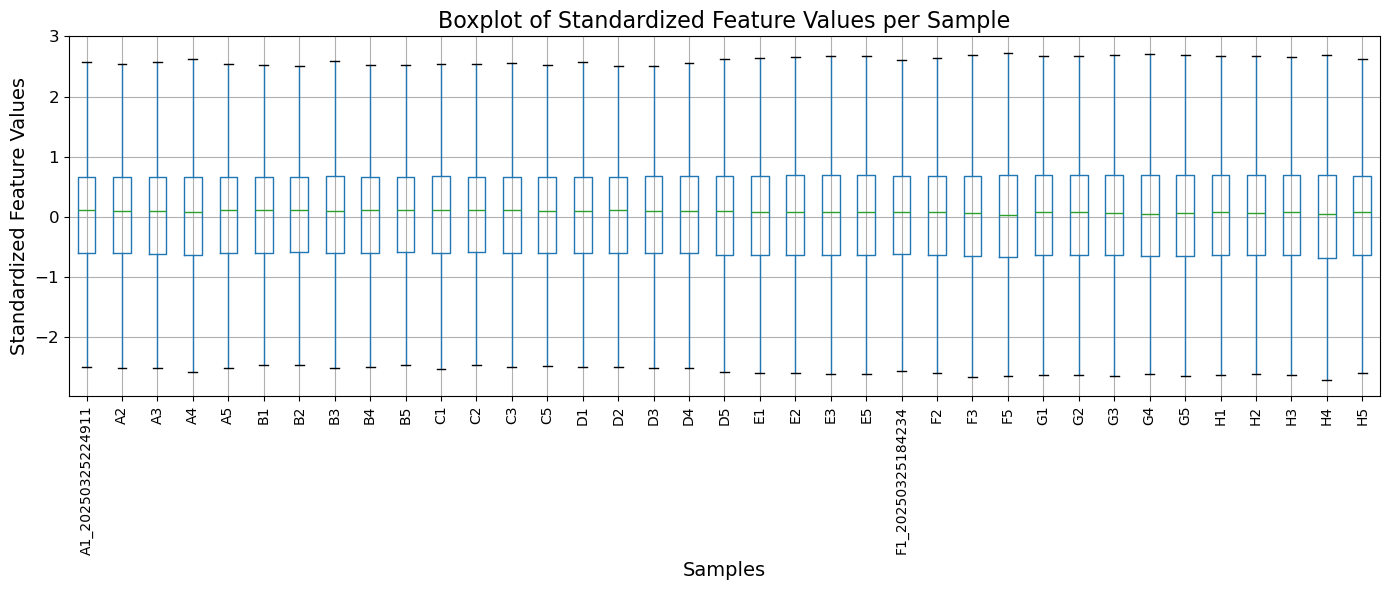

In [364]:
# Reconstruct a DataFrame from df_scaled for easier plotting
df_scaled_df = pd.DataFrame(df_scaled, index=df_imputed.index, columns=df_imputed.columns)

# Boxplot per sample (i.e., each box is one sample)
plt.figure(figsize=(14, 6))
df_scaled_df.boxplot(showfliers=False)  # Set to True if you want to show outliers

# Plot formatting
plt.title("Boxplot of Standardized Feature Values per Sample", fontsize=16)
plt.xlabel("Samples", fontsize=14)
plt.ylabel("Standardized Feature Values", fontsize=14)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

In [365]:
print("Shape of df_scaled_df:", df_scaled_df.shape)

Shape of df_scaled_df: (9782, 37)


In [366]:
print("Any missing values?", df_scaled_df.isnull().values.any())

Any missing values? False


In [367]:
print("Overall mean:", df_scaled_df.values.mean())
print("Overall std:", df_scaled_df.values.std())

Overall mean: -1.6608529578681328e-17
Overall std: 1.0


In [368]:
df_scaled_T = df_scaled_df.T  # Now shape is (37, 9782)

In [369]:
print("Shape of df_scaled_df:", df_scaled_df.T.shape)

Shape of df_scaled_df: (37, 9782)


In [370]:
print("Any missing values?", df_scaled_df.T.isnull().values.any())

Any missing values? False


In [371]:
print("Overall mean:", df_scaled_df.T.values.mean())
print("Overall std:", df_scaled_df.T.values.std())

Overall mean: -1.6608529578681328e-17
Overall std: 1.0


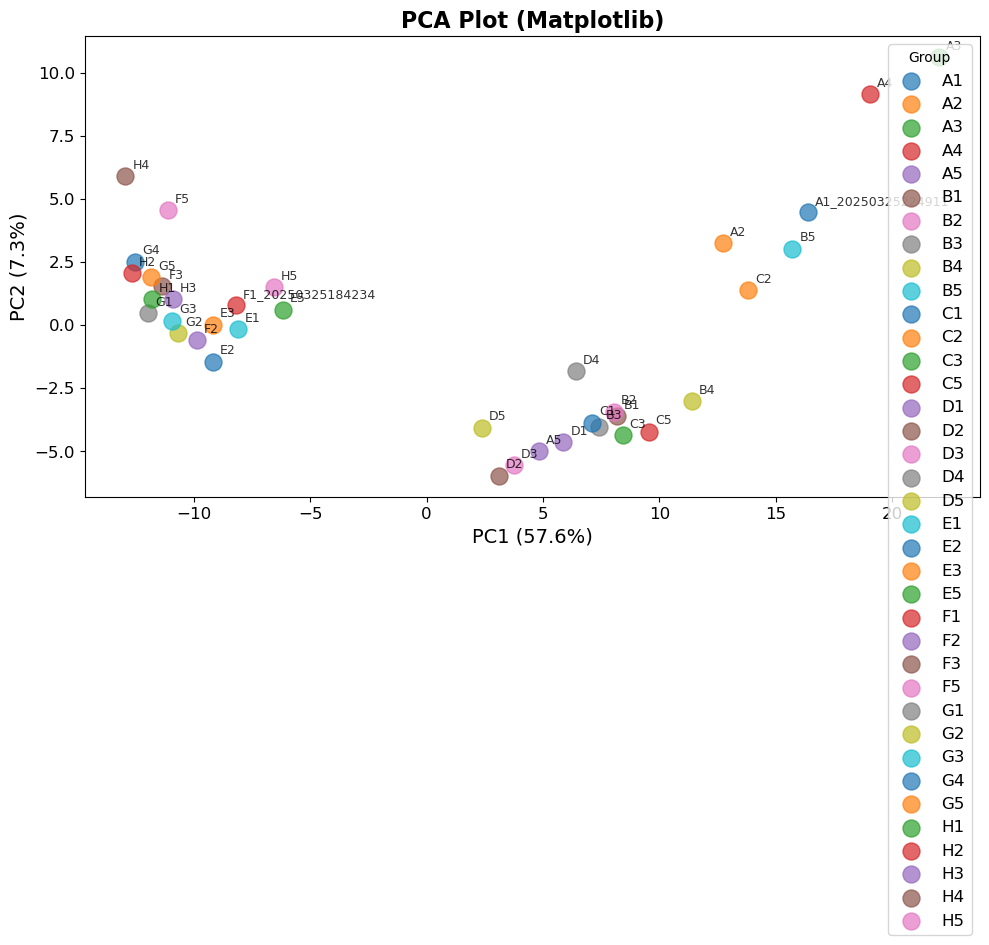

In [372]:
# Transpose so samples are rows
df_scaled_T = df_scaled_df.T

# ✅ Convert all column names (features) to strings
df_scaled_T.columns = df_scaled_T.columns.astype(str)

# PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(df_scaled_T)

# Step 2: Create DataFrame with PCA results
pca_df = pd.DataFrame(pca_data, columns=["PC1", "PC2"])
pca_df["Sample"] = df_scaled_T.index  # Sample names from rows
pca_df["Group"] = pca_df["Sample"].str.split("_").str[0]  # Customize based on your naming # not good for 

# Step 3: Plot with Matplotlib
fig, ax = plt.subplots(figsize=(10, 8))

# Color by group
for group in pca_df["Group"].unique():
    group_data = pca_df[pca_df["Group"] == group]
    ax.scatter(group_data["PC1"], group_data["PC2"], label=f"{group}", s=150, alpha=0.7)

# Optional: annotate each sample
for _, row in pca_df.iterrows():
    ax.text(row["PC1"] + 0.3, row["PC2"] + 0.3, row["Sample"], fontsize=9, alpha=0.8)

# Variance explained for axis labels
explained_var = PCA(n_components=2).fit(df_scaled_T).explained_variance_ratio_ * 100
ax.set_xlabel(f"PC1 ({explained_var[0]:.1f}%)", fontsize=14)
ax.set_ylabel(f"PC2 ({explained_var[1]:.1f}%)", fontsize=14)

# Final formatting
ax.set_title("PCA Plot (Matplotlib)", fontsize=16, fontweight="bold")
ax.legend(title="Group", fontsize=12)
ax.tick_params(labelsize=12)
plt.tight_layout()
plt.show()

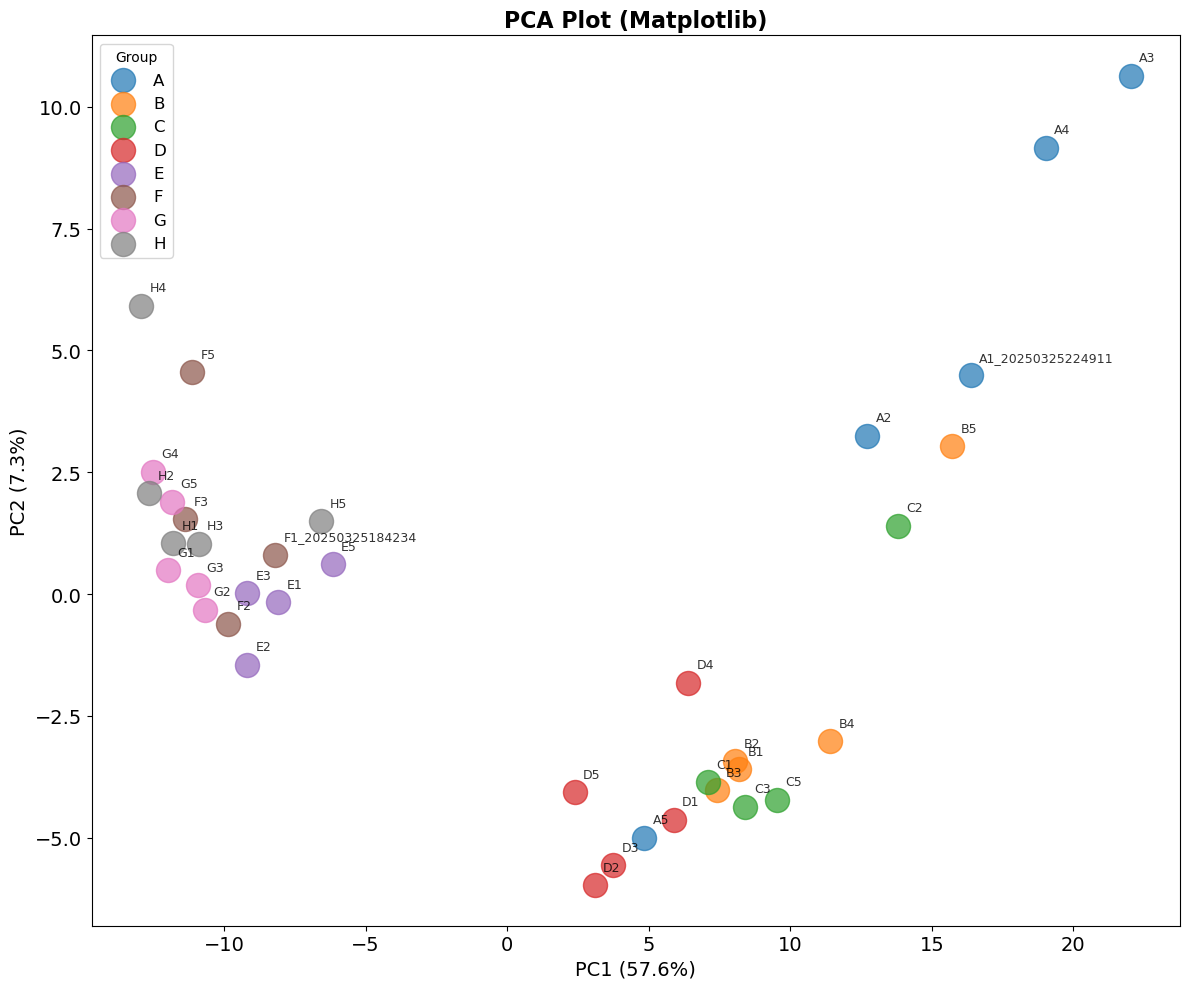

In [373]:
# Transpose so samples are rows
df_scaled_T = df_scaled_df.T

# ✅ Convert all column names (features) to strings
df_scaled_T.columns = df_scaled_T.columns.astype(str)

# PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(df_scaled_T)

# Step 2: Create DataFrame with PCA results
pca_df = pd.DataFrame(pca_data, columns=["PC1", "PC2"])
pca_df["Sample"] = df_scaled_T.index  # Sample names from rows
pca_df["Group"] = pca_df["Sample"].str[0]  # Customize based on your naming # not good for 

# Step 3: Plot with Matplotlib
fig, ax = plt.subplots(figsize=(12, 10))

# Color by group
for group in pca_df["Group"].unique():
    group_data = pca_df[pca_df["Group"] == group]
    ax.scatter(group_data["PC1"], group_data["PC2"], label=f"{group}", s=300, alpha=0.7) #dot size s=400

# Optional: annotate each sample
for _, row in pca_df.iterrows():
    ax.text(row["PC1"] + 0.3, row["PC2"] + 0.3, row["Sample"], fontsize=9, alpha=0.8)

# Variance explained for axis labels
explained_var = PCA(n_components=2).fit(df_scaled_T).explained_variance_ratio_ * 100
ax.set_xlabel(f"PC1 ({explained_var[0]:.1f}%)", fontsize=14)
ax.set_ylabel(f"PC2 ({explained_var[1]:.1f}%)", fontsize=14)

# Final formatting
ax.set_title("PCA Plot (Matplotlib)", fontsize=16, fontweight="bold") #axis label fontsize+
ax.legend(title="Group", fontsize=12)
ax.tick_params(labelsize=14)
plt.tight_layout()
plt.show()

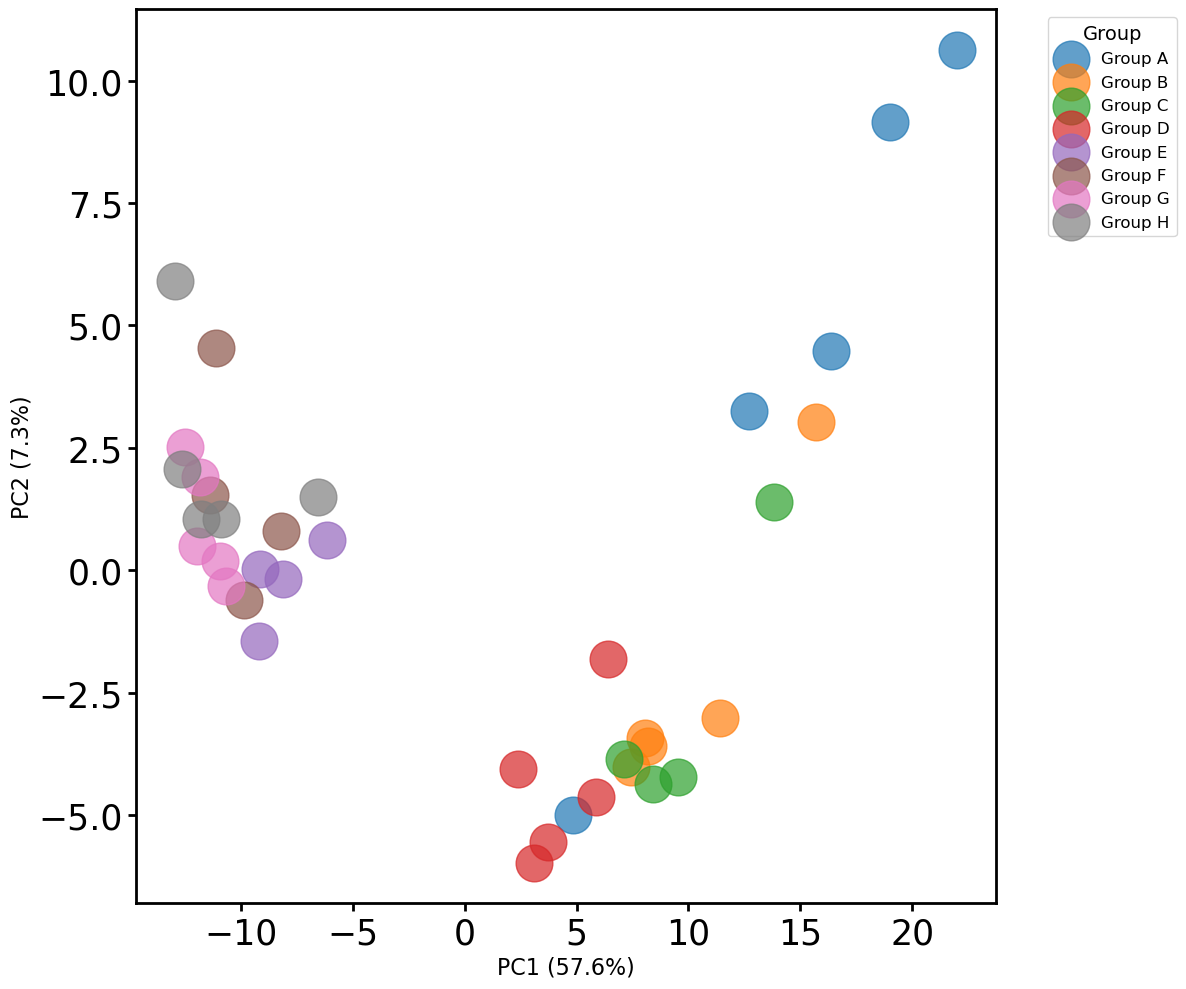

In [374]:

# Step 1: Perform PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(df_scaled_T)

# Step 2: Create DataFrame with PCA results
pca_df = pd.DataFrame(pca_data, columns=["PC1", "PC2"])
pca_df["Sample"] = df_scaled_T.index
pca_df["Group"] = pca_df["Sample"].str[0]  # Adjust if needed

# Step 3: Plot
fig, ax = plt.subplots(figsize=(12, 10))

# Plot each group with larger dots
for group in pca_df["Group"].unique():
    group_data = pca_df[pca_df["Group"] == group]
    ax.scatter(
        group_data["PC1"],
        group_data["PC2"],
        label=f"Group {group}",
        s=700,
        alpha=0.7
    )

# Axis labels with % variance explained
explained = pca.explained_variance_ratio_ * 100
#ax.set_title("PCA Plot", fontsize=20, fontweight='bold')
ax.set_xlabel(f"PC1 ({explained[0]:.1f}%)", fontsize=16)
ax.set_ylabel(f"PC2 ({explained[1]:.1f}%)", fontsize=16)

# Make axis lines (spines) thicker
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)

# Bigger tick labels
ax.tick_params(width=2, length=6, labelsize=25)

# Legend
ax.legend(title="Group", fontsize=12, title_fontsize=14, bbox_to_anchor=(1.05, 1), loc='upper left')

# Tight layout
plt.tight_layout()

# Step 4: Export as SVG
#plt.savefig(r"C:\Users\MunozestraJ\OneDrive - Cedars-Sinai Health System\Proteomics\Dox experiment\PCA_final.svg", format="svg")

# Optional: Show plot
plt.show()

In [375]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(df_scaled_T)
explained = pca.explained_variance_ratio_ * 100
print("Explained variance:", pca.explained_variance_ratio_)

Explained variance: [0.57624785 0.07318382]


In [376]:
print("Groups detected:", pca_df["Group"].unique())
print("Number of groups:", pca_df["Group"].nunique())

Groups detected: ['A' 'B' 'C' 'D' 'E' 'F' 'G' 'H']
Number of groups: 8


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


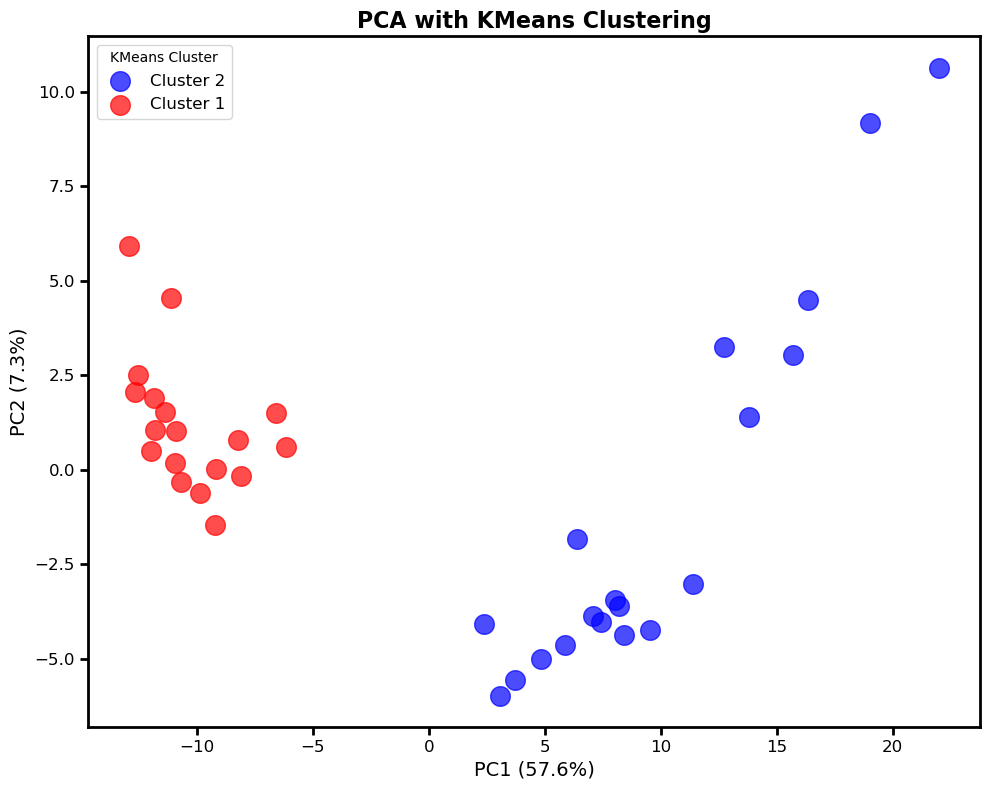

In [377]:
from sklearn.cluster import KMeans

# Step 1: Cluster PCA data (2D) into 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42)
pca_df["Cluster"] = kmeans.fit_predict(pca_df[["PC1", "PC2"]])

# Step 2: Plot with cluster colors instead of groups
fig, ax = plt.subplots(figsize=(10, 8))

# Define cluster colors
colors = ['red', 'blue']  # Or use more for more clusters
for cluster in pca_df["Cluster"].unique():
    cluster_data = pca_df[pca_df["Cluster"] == cluster]
    ax.scatter(cluster_data["PC1"], cluster_data["PC2"],
               label=f"Cluster {cluster+1}", c=colors[cluster],
               s=200, alpha=0.7)

# Axes and legend
explained = pca.explained_variance_ratio_ * 100
ax.set_xlabel(f"PC1 ({explained[0]:.1f}%)", fontsize=14)
ax.set_ylabel(f"PC2 ({explained[1]:.1f}%)", fontsize=14)
ax.set_title("PCA with KMeans Clustering", fontsize=16, fontweight="bold")
ax.legend(title="KMeans Cluster", fontsize=12)
ax.tick_params(labelsize=12)

# Optional: Thicker axes
for spine in ax.spines.values():
    spine.set_linewidth(2)
ax.tick_params(width=2, length=6)

plt.tight_layout()
plt.show()

In [378]:
pd.crosstab(pca_df["Group"], pca_df["Cluster"])

Cluster,0,1
Group,,
A,0,5
B,0,5
C,0,4
D,0,5
E,4,0
F,4,0
G,5,0
H,5,0


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


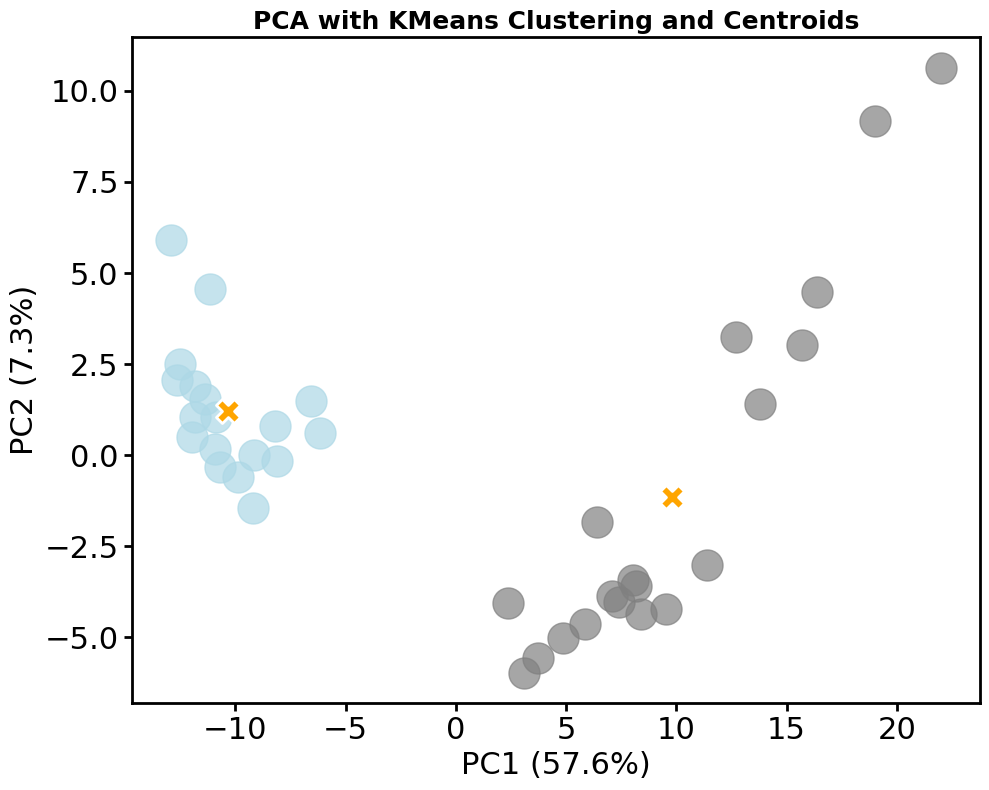

In [379]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Step 1: Cluster PCA data (2 clusters for example)
kmeans = KMeans(n_clusters=2, random_state=42)
pca_df["Cluster"] = kmeans.fit_predict(pca_df[["PC1", "PC2"]])

# Step 2: Get centroids from the KMeans model
centroids = kmeans.cluster_centers_  # shape: (n_clusters, 2)

# Step 3: Plot
fig, ax = plt.subplots(figsize=(10, 8))

# Cluster colors
colors = ['lightblue', 'gray']
for cluster in pca_df["Cluster"].unique():
    cluster_data = pca_df[pca_df["Cluster"] == cluster]
    ax.scatter(
        cluster_data["PC1"],
        cluster_data["PC2"],
        label=f"Cluster {cluster+1}",
        c=colors[cluster],
        s=500,
        alpha=0.7
    )

# Step 4: Plot centroids
ax.scatter(
    centroids[:, 0],  # PC1
    centroids[:, 1],  # PC2
    marker='X',
    s=300,
    c='orange',
    label='Centroid',
    edgecolor='white',
    linewidth=2
)

# Axis formatting
explained = pca.explained_variance_ratio_ * 100
ax.set_xlabel(f"PC1 ({explained[0]:.1f}%)", fontsize=22)
ax.set_ylabel(f"PC2 ({explained[1]:.1f}%)", fontsize=22)
ax.set_title("PCA with KMeans Clustering and Centroids", fontsize=18, fontweight="bold")
ax.tick_params(labelsize=22)
for spine in ax.spines.values():
    spine.set_linewidth(2)
ax.tick_params(width=2, length=6)
#ax.legend(title="Cluster", fontsize=16)
plt.tight_layout()

#plt.savefig(r"C:\Users\MunozestraJ\OneDrive - Cedars-Sinai Health System\Proteomics\Dox experiment\PCA_withKMeans.svg", format="svg")
plt.show()

C:\Users\MeyerJ\AppData\Local\Temp\ipykernel_63864\3235572335.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_plot, x="Group", y=gene_of_interest, inner="box", palette="Set2")


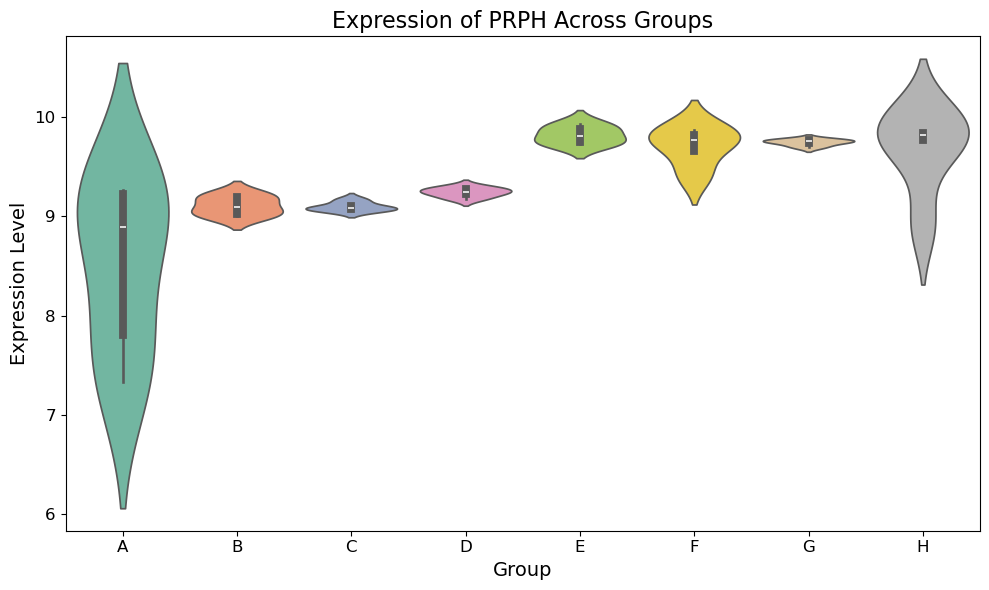

In [380]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Transpose to get samples as rows
df_plot = df_imputed.T

# Step 2: Add group info based on sample names
df_plot["Group"] = df_plot.index.str[0]

# Step 3: Choose gene of interest (make sure it's in the column names now)
gene_of_interest = "PRPH"  # Replace with a valid gene name from df_imputed.index

# Step 4: Move the gene from index to column if necessary
df_plot.columns = df_plot.columns.astype(str)
if gene_of_interest not in df_plot.columns:
    df_plot[gene_of_interest] = df_imputed.loc[gene_of_interest].values

# Step 5: Violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(data=df_plot, x="Group", y=gene_of_interest, inner="box", palette="Set2")

# Step 6: Plot styling
plt.title(f"Expression of {gene_of_interest} Across Groups", fontsize=16)
plt.xlabel("Group", fontsize=14)
plt.ylabel("Expression Level", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

In [381]:
print(df_imputed.index[:10].tolist())

['NUDT4B', 'NBPF1;NBPF10;NBPF19;NBPF20;NBPF8;NBPF9', 'GATD3;GATD3B', 'PIGBOS1', 'TMEM275', 'NBDY', 'CENPVL3', 'MMP24OS', 'PNMA8C', 'MSANTD7']


C:\Users\MeyerJ\AppData\Local\Temp\ipykernel_63864\1727320895.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_plot, x="Group", y=gene_of_interest, inner="box", palette="Set2")


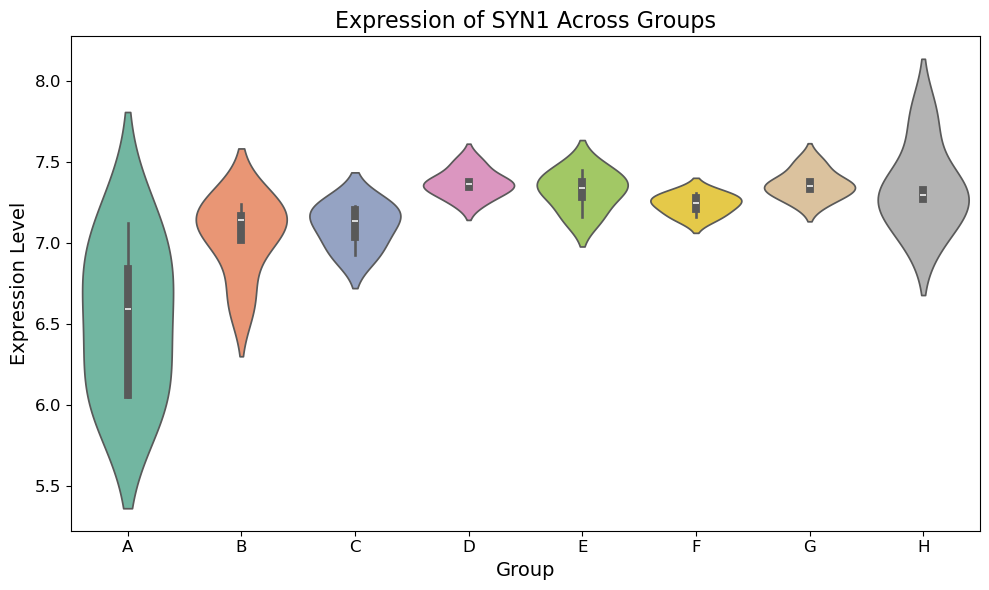

In [382]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Transpose to get samples as rows
df_plot = df_imputed.T

# Step 2: Add group info based on sample names
df_plot["Group"] = df_plot.index.str[0]

# Step 3: Choose gene of interest (make sure it's in the column names now)
gene_of_interest = "SYN1"  # Replace with a valid gene name from df_imputed.index

# Step 4: Move the gene from index to column if necessary
df_plot.columns = df_plot.columns.astype(str)
if gene_of_interest not in df_plot.columns:
    df_plot[gene_of_interest] = df_imputed.loc[gene_of_interest].values

# Step 5: Violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(data=df_plot, x="Group", y=gene_of_interest, inner="box", palette="Set2")

# Step 6: Plot styling
plt.title(f"Expression of {gene_of_interest} Across Groups", fontsize=16)
plt.xlabel("Group", fontsize=14)
plt.ylabel("Expression Level", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

In [383]:
import pandas as pd

# Step 1: Transpose to get samples as rows
df_plot = df_imputed.T.copy()  # Now shape: (samples, genes)

# Step 2: Add group info (based on sample name, e.g., 'A1' → group 'A')
df_plot["Group"] = df_plot.index.str[0]  # Adjust if your sample names are different

# Step 3: Extract expression of the gene of interest (e.g., TP53)
gene_of_interest = "SLC17A6"  # Make sure it's a valid gene in df_imputed.index
gene_data = df_plot[[gene_of_interest, "Group"]]  # Keep only gene and group

# Step 4: Export to Excel
output_path = r"C:\Users\MunozestraJ\OneDrive - Cedars-Sinai Health System\Proteomics\Dox experiment\SC17A6_expression_by_group.xlsx"
#gene_data.to_excel(output_path)

print("Exported:", output_path)

Exported: C:\Users\MunozestraJ\OneDrive - Cedars-Sinai Health System\Proteomics\Dox experiment\SC17A6_expression_by_group.xlsx


### Differential expression between clusters.

In [384]:
# Step 1: Transpose df_imputed to get samples as rows
df_expr = df_imputed.T.copy()  # shape: (samples, proteins)

# Step 2: Add Cluster labels to expression matrix
df_expr["Cluster"] = pca_df.set_index("Sample").loc[df_expr.index, "Cluster"]

# Step 3: Group by cluster and compute mean expression
cluster_means = df_expr.groupby("Cluster").mean().T  # shape: (proteins, 2 clusters)

# Step 4: Compute absolute difference between clusters
cluster_means["diff"] = abs(cluster_means[0] - cluster_means[1])

# Step 5: Sort by difference and get top 10 proteins
top_proteins = cluster_means.sort_values("diff", ascending=False).head(20)
print("Top 20 proteins separating clusters:\n")
print(top_proteins)

Top 20 proteins separating clusters:

Cluster         0         1      diff
Genes                                
GFAP     3.380335  6.863832  3.483497
HOXA5    2.561525  5.189385  2.627860
ANXA1    4.553478  7.161579  2.608101
HSPB1    4.605988  7.179427  2.573439
HOXB8    4.035635  6.585588  2.549953
SLC32A1  2.824306  5.351210  2.526904
NFIC     3.325567  5.737332  2.411766
CALD1    4.335401  6.738439  2.403037
AHNAK    5.309439  7.702578  2.393139
SLC15A3  1.515754  3.827702  2.311948
NFIA     2.989620  5.288909  2.299288
FLNA     5.643563  7.914232  2.270669
IFI16    3.578490  5.842819  2.264329
ITGA6    4.202509  6.423512  2.221003
IQGAP1   4.287868  6.473611  2.185743
LGALS3   3.199042  5.376296  2.177254
HSPB6    2.529805  4.671168  2.141364
RAB13    3.458017  5.599191  2.141174
PDLIM3   4.079508  6.220296  2.140788
LGALS1   3.567206  5.704405  2.137199


In [385]:
# Cross-tabulate clusters and original groups
cluster_group_counts = pd.crosstab(pca_df["Cluster"], pca_df["Group"])

# Display the mapping
print(cluster_group_counts)

Group    A  B  C  D  E  F  G  H
Cluster                        
0        0  0  0  0  4  4  5  5
1        5  5  4  5  0  0  0  0


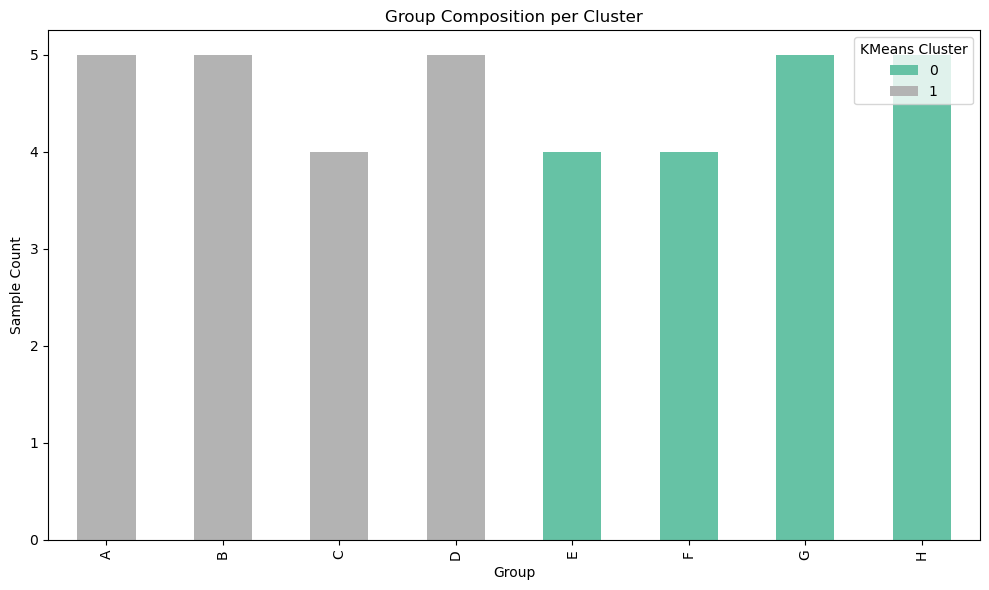

In [386]:
cluster_group_counts.T.plot(kind="bar", stacked=True, figsize=(10, 6), colormap="Set2")
plt.title("Group Composition per Cluster")
plt.xlabel("Group")
plt.ylabel("Sample Count")
plt.legend(title="KMeans Cluster")
plt.tight_layout()
plt.show()

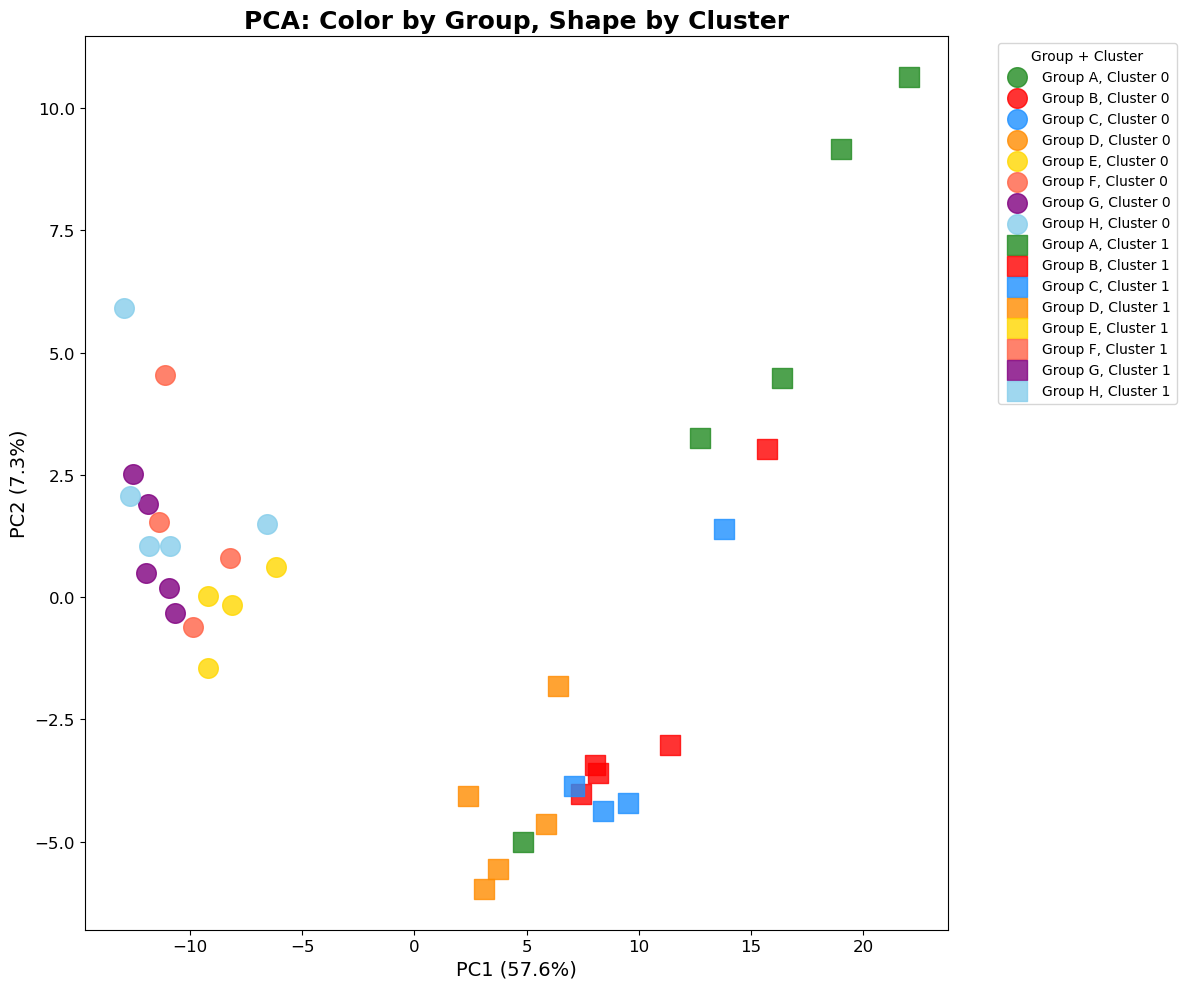

In [387]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Setup colors and marker shapes
group_colors = {
    "A": "forestgreen", "B": "red", "C": "dodgerblue", "D": "darkorange",
    "E": "gold", "F": "tomato", "G": "purple", "H": "skyblue"
}

cluster_markers = {
    0: "o",  # circle
    1: "s",  # square
}

# Create figure
fig, ax = plt.subplots(figsize=(12, 10))

# Plot each sample by group (color) and cluster (shape)
for cluster in sorted(pca_df["Cluster"].unique()):
    for group in sorted(pca_df["Group"].unique()):
        subset = pca_df[(pca_df["Cluster"] == cluster) & (pca_df["Group"] == group)]
        ax.scatter(
            subset["PC1"],
            subset["PC2"],
            color=group_colors.get(group, "gray"),
            marker=cluster_markers.get(cluster, "o"),
            s=200,
            alpha=0.8,
            label=f"Group {group}, Cluster {cluster}"
        )

# Axis formatting
explained = pca.explained_variance_ratio_ * 100
ax.set_xlabel(f"PC1 ({explained[0]:.1f}%)", fontsize=14)
ax.set_ylabel(f"PC2 ({explained[1]:.1f}%)", fontsize=14)
ax.set_title("PCA: Color by Group, Shape by Cluster", fontsize=18, fontweight="bold")
ax.tick_params(labelsize=12)

# Legend (no duplicates)
handles, labels = ax.get_legend_handles_labels()
unique_labels = dict(zip(labels, handles))
ax.legend(unique_labels.values(), unique_labels.keys(), title="Group + Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

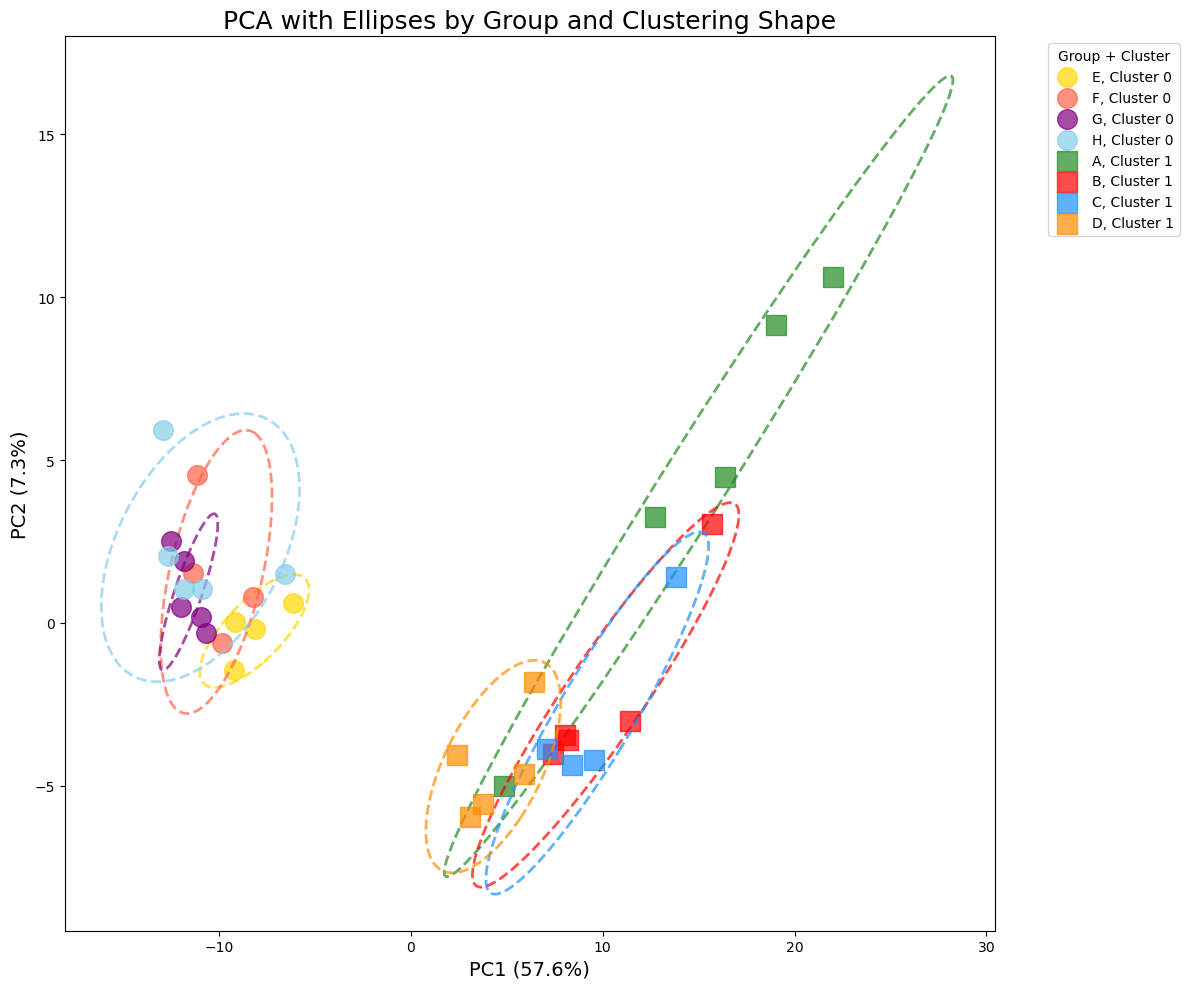

In [388]:
import matplotlib.patches as mpatches
import numpy as np

fig, ax = plt.subplots(figsize=(12, 10))

# Plot each group with unique color, marker shape based on cluster
for cluster in sorted(pca_df["Cluster"].unique()):
    for group in sorted(pca_df["Group"].unique()):
        subset = pca_df[(pca_df["Group"] == group) & (pca_df["Cluster"] == cluster)]
        if subset.empty:
            continue

        # Plot points
        ax.scatter(
            subset["PC1"],
            subset["PC2"],
            color=group_colors.get(group, "gray"),
            marker=cluster_markers.get(cluster, "o"),
            s=200,
            alpha=0.7,
            label=f"{group}, Cluster {cluster}"
        )

        # Add ellipse around the group
        if len(subset) >= 3:  # Need at least 3 points to define an ellipse
            cov = np.cov(subset[["PC1", "PC2"]].T)
            lambda_, v = np.linalg.eig(cov)
            lambda_ = np.sqrt(lambda_)
            ell = mpatches.Ellipse(
                xy=(subset["PC1"].mean(), subset["PC2"].mean()),
                width=lambda_[0] * 4,  # 2 std dev
                height=lambda_[1] * 4,
                angle=np.rad2deg(np.arccos(v[0, 0])),
                edgecolor=group_colors.get(group, "gray"),
                facecolor='none',
                linewidth=2,
                linestyle="--",
                alpha=0.7
            )
            ax.add_patch(ell)

# Axes
explained = pca.explained_variance_ratio_ * 100
ax.set_xlabel(f"PC1 ({explained[0]:.1f}%)", fontsize=14)
ax.set_ylabel(f"PC2 ({explained[1]:.1f}%)", fontsize=14)
ax.set_title("PCA with Ellipses by Group and Clustering Shape", fontsize=18)

# Legend cleanup
handles, labels = ax.get_legend_handles_labels()
unique = dict(zip(labels, handles))
ax.legend(unique.values(), unique.keys(), title="Group + Cluster", bbox_to_anchor=(1.05, 1), loc="upper left")

plt.tight_layout()
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


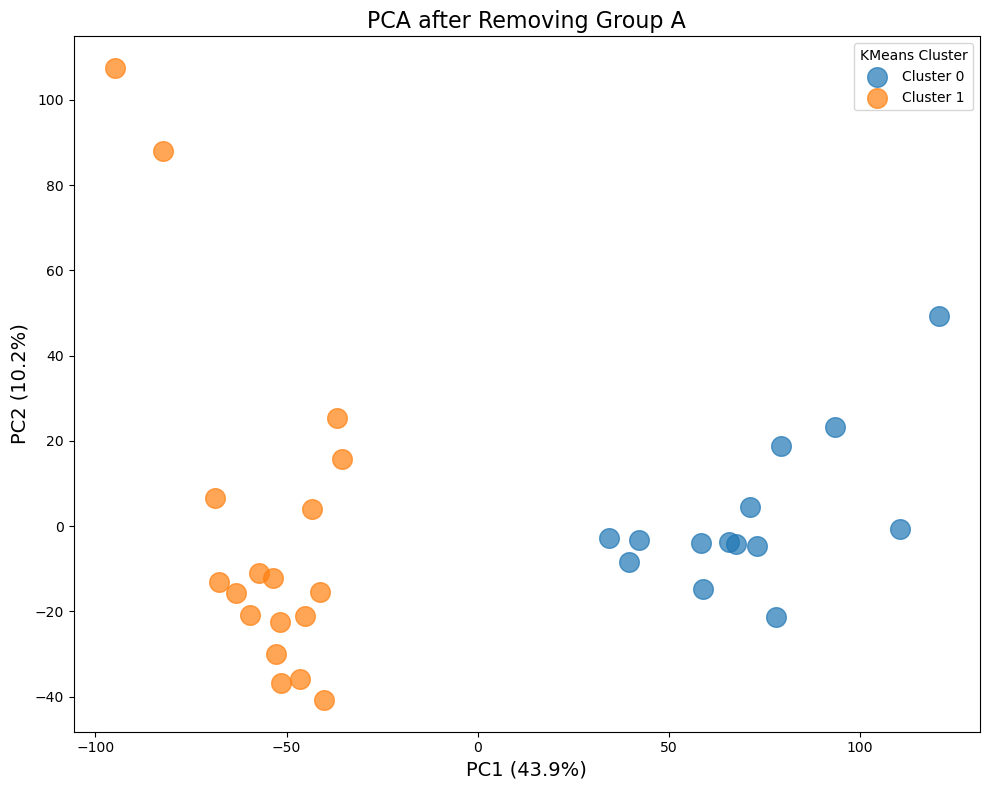

In [389]:
# Step 1: Remove Group A
samples_to_keep = pca_df[pca_df["Group"] != "A"]["Sample"]
df_filtered = df_imputed.loc[:, samples_to_keep]

# Step 2: Transpose and fix column types
df_filtered_T = df_filtered.T.copy()
df_filtered_T.columns = df_filtered_T.columns.astype(str)

# Step 3: Standardize
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled_filtered = scaler.fit_transform(df_filtered_T)

# ✅ Step 4: Run PCA on filtered data
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_data_filtered = pca.fit_transform(df_scaled_filtered)  # 🔥 This was missing

# ✅ Step 5: Run KMeans clustering on PCA output
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(pca_data_filtered)

# Step 6: Build new PCA DataFrame
import pandas as pd
pca_filtered_df = pd.DataFrame(pca_data_filtered, columns=["PC1", "PC2"])
pca_filtered_df["Sample"] = df_filtered.columns
pca_filtered_df["Group"] = pca_filtered_df["Sample"].str[0]
pca_filtered_df["Cluster"] = clusters  # ✅ Now this works!

# Step 7: Plot
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 8))
for cluster in pca_filtered_df["Cluster"].unique():
    cluster_data = pca_filtered_df[pca_filtered_df["Cluster"] == cluster]
    ax.scatter(
        cluster_data["PC1"], cluster_data["PC2"],
        label=f"Cluster {cluster}", s=200, alpha=0.7
    )

explained = pca.explained_variance_ratio_ * 100
ax.set_title("PCA after Removing Group A", fontsize=16)
ax.set_xlabel(f"PC1 ({explained[0]:.1f}%)", fontsize=14)
ax.set_ylabel(f"PC2 ({explained[1]:.1f}%)", fontsize=14)
ax.legend(title="KMeans Cluster")
plt.tight_layout()
plt.show()

In [390]:
print(f"Explained variance (PC1): {explained[0]:.2f}%")
print(f"Explained variance (PC2): {explained[1]:.2f}%")

Explained variance (PC1): 43.94%
Explained variance (PC2): 10.20%


C:\Users\MeyerJ\AppData\Local\Temp\ipykernel_63864\1882746542.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=gene_df, x="Cluster", y="Z_score", palette="Set2")


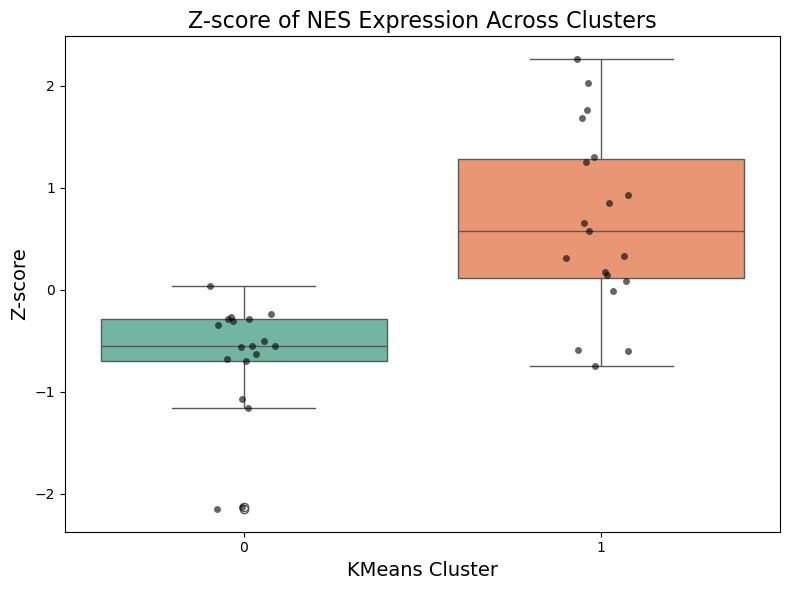

✅ Exported Z-scores to: C:\Users\MunozestraJ\OneDrive - Cedars-Sinai Health System\Proteomics\Dox experiment\NES_zscores.xlsx


In [391]:
from scipy.stats import zscore

# Step 1: Extract gene expression across all samples
gene = "NES"
gene_expr = df_imputed.loc[gene]  # This is a Series: index = sample names, values = expression

# Step 2: Convert to DataFrame and add Cluster info
gene_df = pd.DataFrame({"Expression": gene_expr})
gene_df["Sample"] = gene_df.index
gene_df["Cluster"] = gene_df["Sample"].map(pca_df.set_index("Sample")["Cluster"])

# Step 3: Compute Z-score of expression across all samples
gene_df["Z_score"] = zscore(gene_df["Expression"])

# Step 4: Compare distributions across clusters
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.boxplot(data=gene_df, x="Cluster", y="Z_score", palette="Set2")
sns.stripplot(data=gene_df, x="Cluster", y="Z_score", color="black", alpha=0.6)

plt.title(f"Z-score of {gene} Expression Across Clusters", fontsize=16)
plt.xlabel("KMeans Cluster", fontsize=14)
plt.ylabel("Z-score", fontsize=14)
plt.tight_layout()
plt.show()

# Step 4: Export to Excel
output_path = r"C:\Users\MunozestraJ\OneDrive - Cedars-Sinai Health System\Proteomics\Dox experiment\NES_zscores.xlsx"
#gene_df.to_excel(output_path, index=False)

print("✅ Exported Z-scores to:", output_path)

In [392]:
from scipy.stats import zscore

# Step 1: Define your list of genes (or use top ones)
genes_of_interest = ["NES", "TUBB3", "GFAP", "PRPH", "SLC17A7", "SLC17A6", "RBFOX3", "MAP2", "SYN1","SOX2","CD44", "SYP", "MKI67", "ALDH1L1", "DLG4", "DCX"]  # Replace with your list

# Step 2: Transpose df_imputed to shape (samples x genes)
df_expr = df_imputed.T.copy()
df_expr["Sample"] = df_expr.index
df_expr["Group"] = df_expr["Sample"].str[0]  # Adjust if needed
df_expr["Cluster"] = df_expr["Sample"].map(pca_df.set_index("Sample")["Cluster"])

# Step 3: Melt into long format
df_long = df_expr[genes_of_interest + ["Sample", "Group", "Cluster"]].melt(
    id_vars=["Sample", "Group", "Cluster"],
    var_name="Gene",
    value_name="Expression"
)

# Step 4: Compute Z-scores for each gene across all samples
df_long["Z_score"] = df_long.groupby("Gene")["Expression"].transform(zscore)

# Step 5: Export to Excel
output_path = r"C:\Users\MunozestraJ\OneDrive - Cedars-Sinai Health System\Proteomics\Dox experiment\multi_gene_zscores1.xlsx"
#df_long.to_excel(output_path, index=False)

print("✅ Exported multi-gene Z-scores to:", output_path)

✅ Exported multi-gene Z-scores to: C:\Users\MunozestraJ\OneDrive - Cedars-Sinai Health System\Proteomics\Dox experiment\multi_gene_zscores1.xlsx


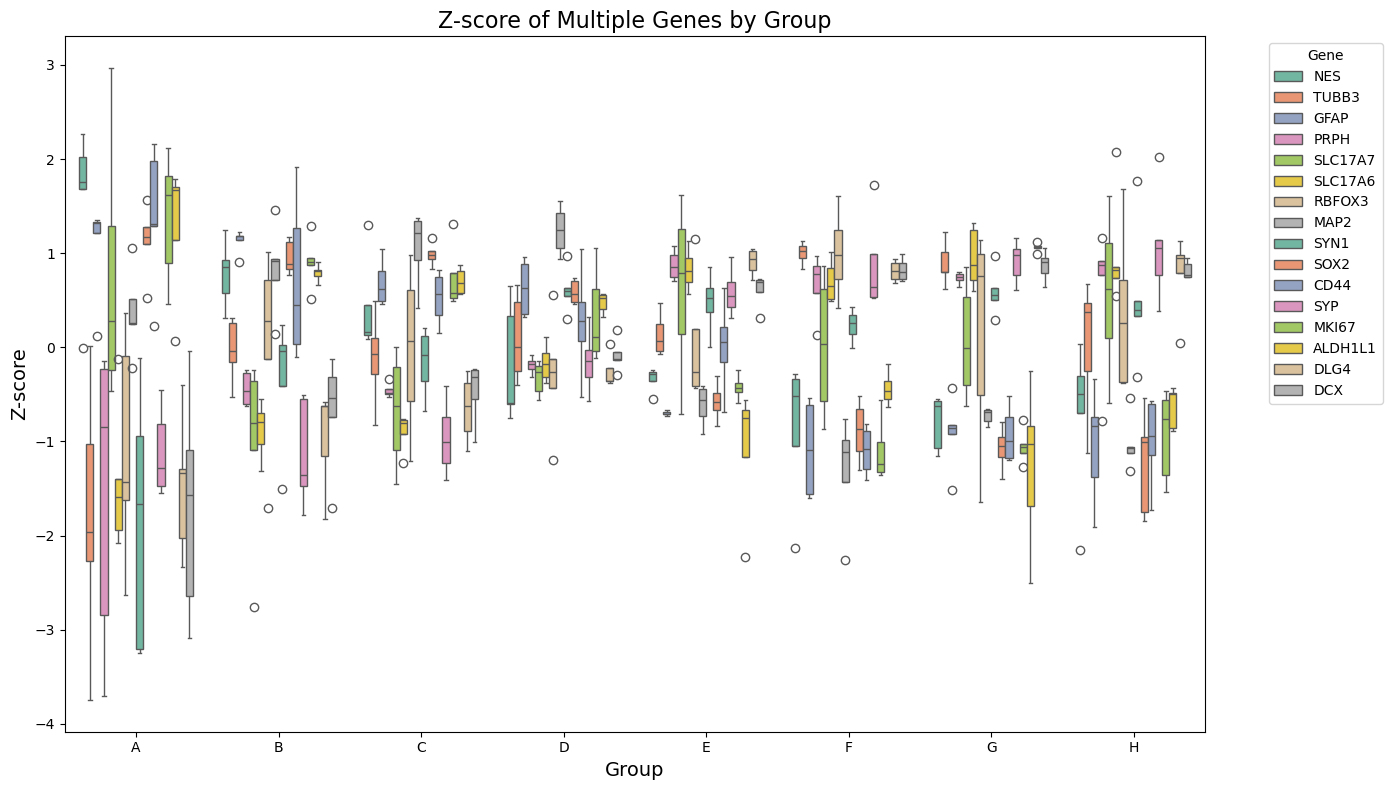

In [393]:
import seaborn as sns
import matplotlib.pyplot as plt

# Use the DataFrame from your earlier export, e.g., `df_long`
plt.figure(figsize=(14, 8))
sns.boxplot(data=df_long, x="Group", y="Z_score", hue="Gene", palette="Set2")

plt.title("Z-score of Multiple Genes by Group", fontsize=16)
plt.xlabel("Group", fontsize=14)
plt.ylabel("Z-score", fontsize=14)
plt.legend(title="Gene", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

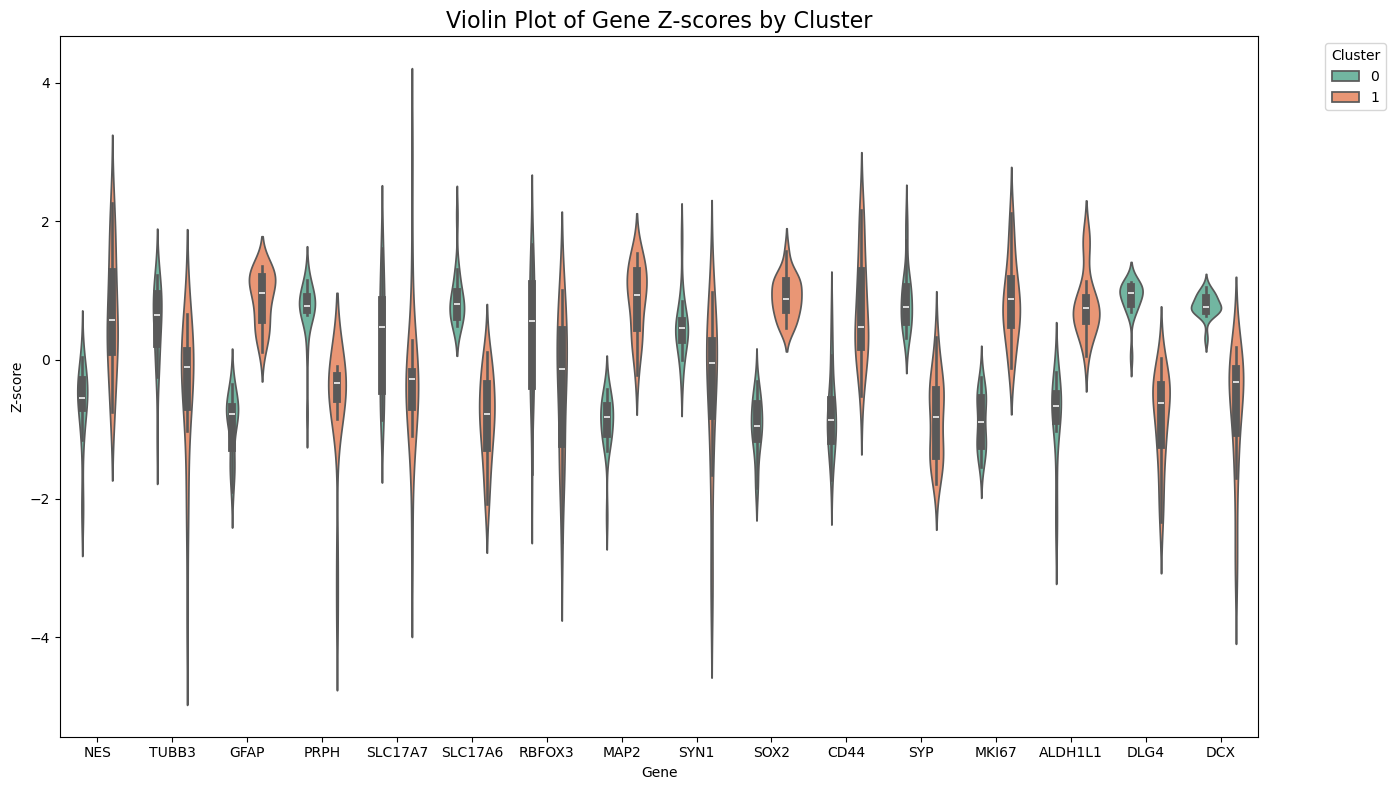

In [394]:
plt.figure(figsize=(14, 8))
sns.violinplot(
    data=df_long,
    x="Gene",
    y="Z_score",
    hue="Cluster",  # ✅ Switch hue to cluster instead
    palette="Set2",
    dodge=True       # Separates the clusters side-by-side
)

plt.title("Violin Plot of Gene Z-scores by Cluster", fontsize=16)
plt.xlabel("Gene")
plt.ylabel("Z-score")
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

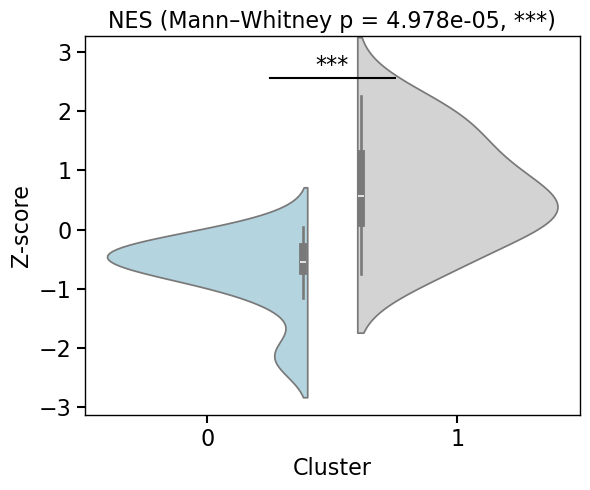

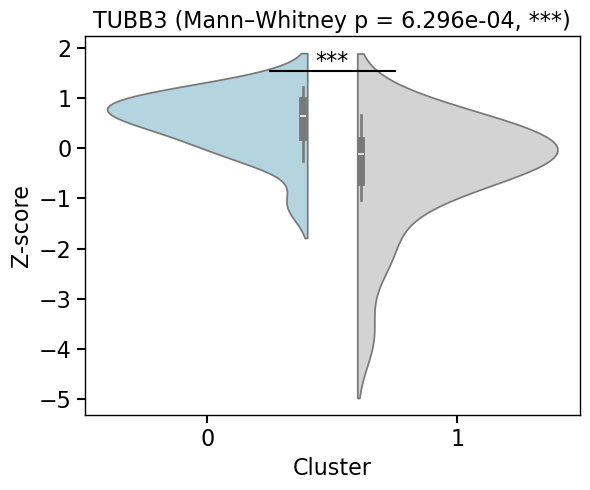

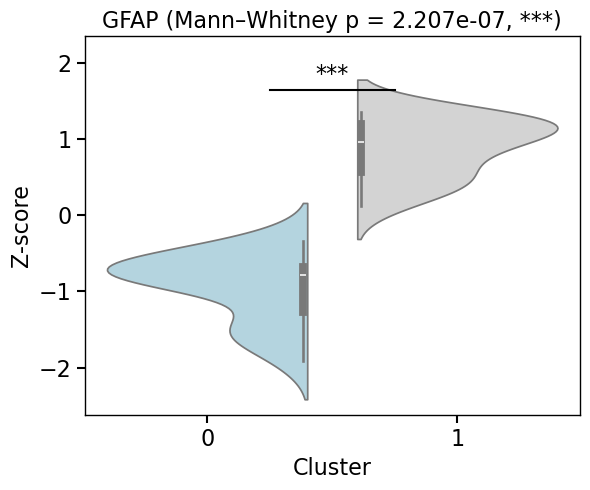

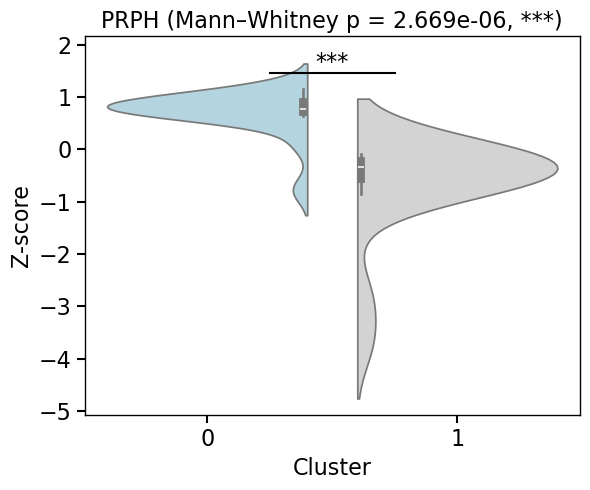

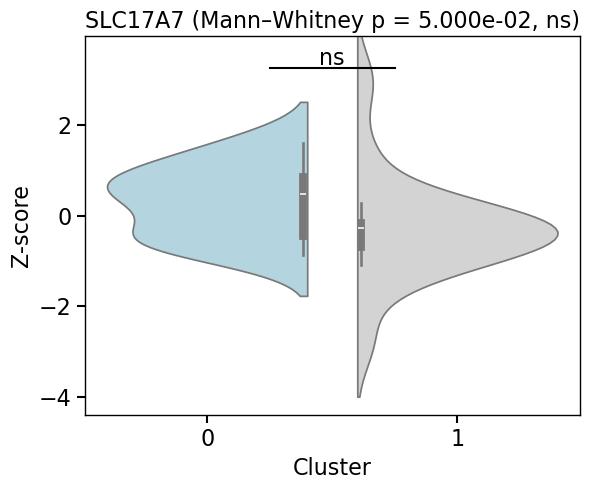

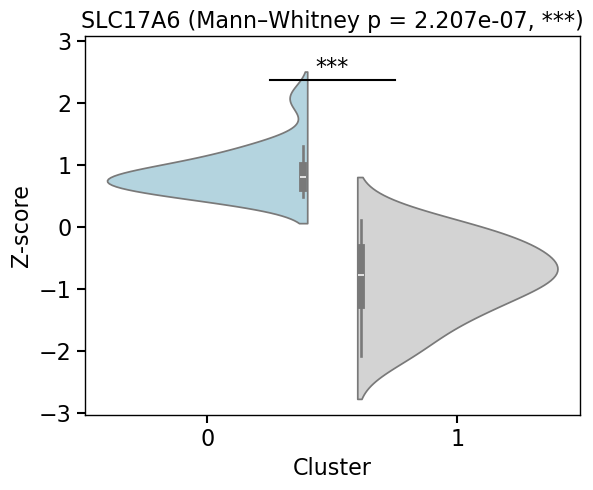

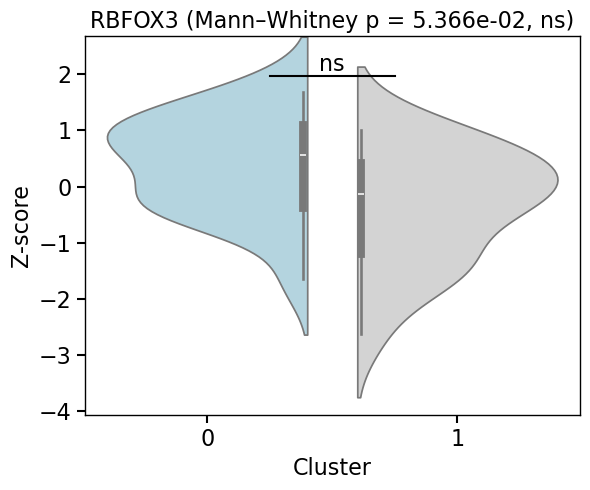

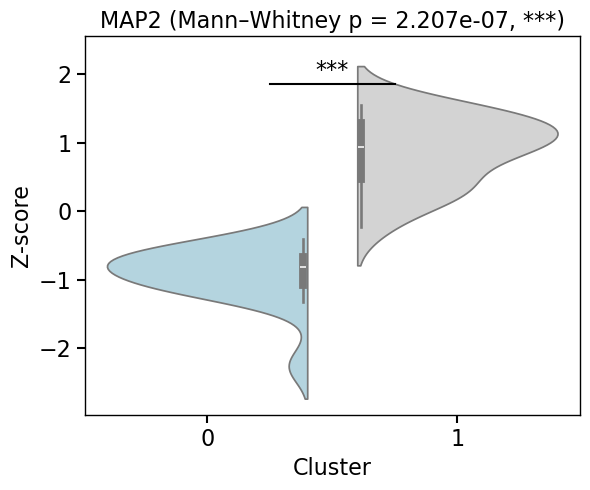

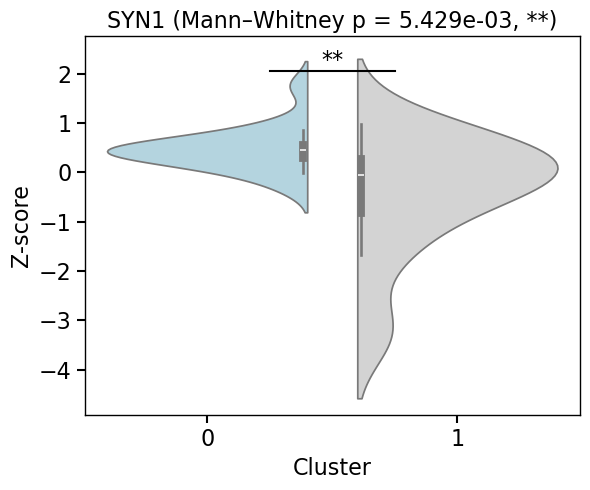

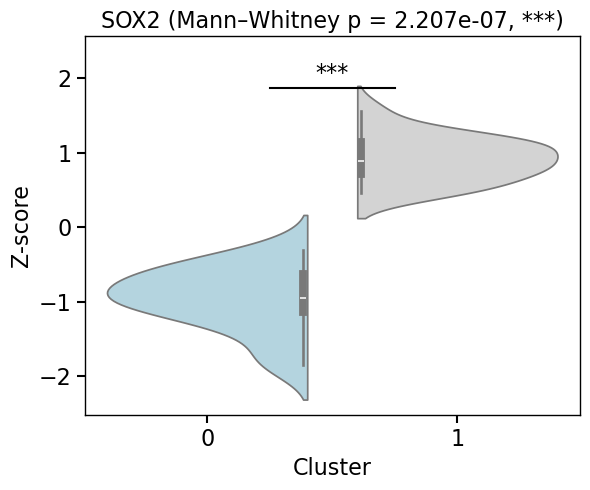

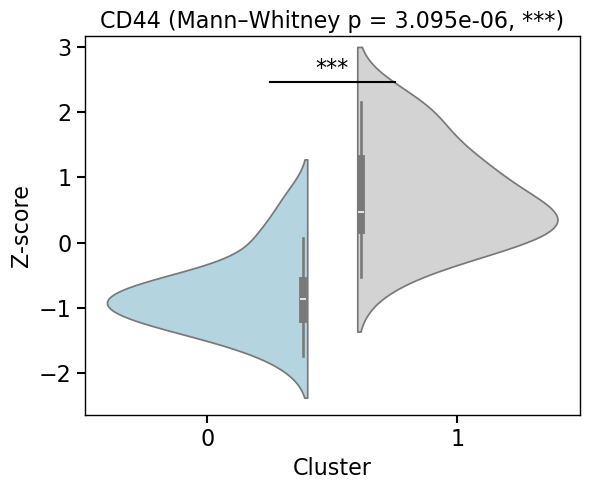

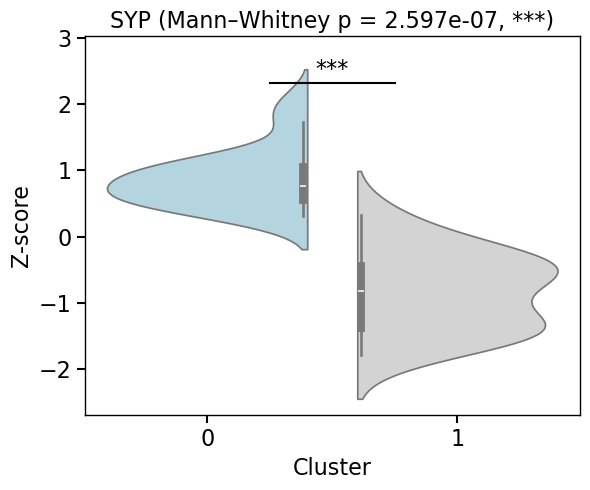

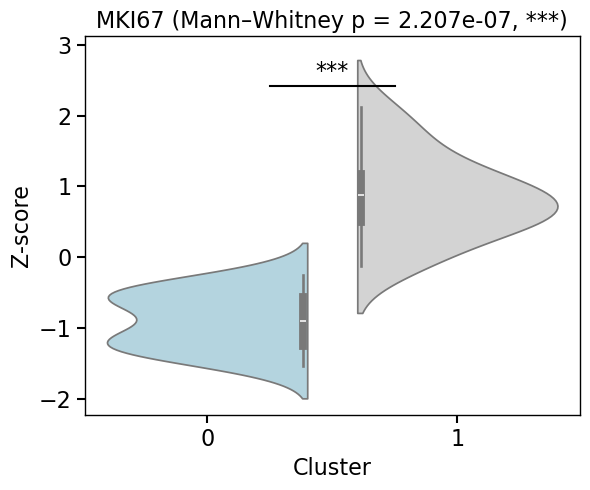

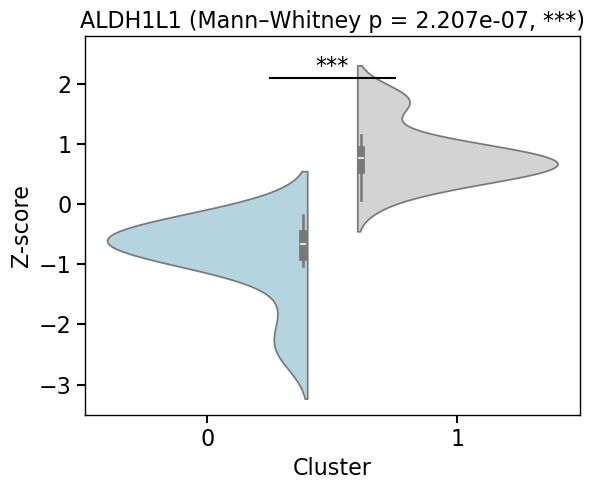

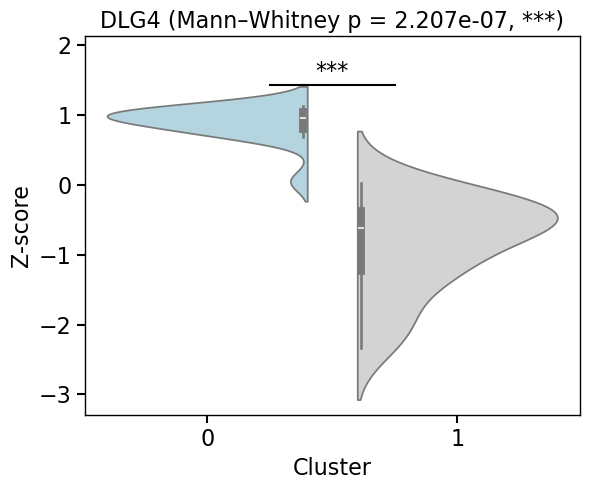

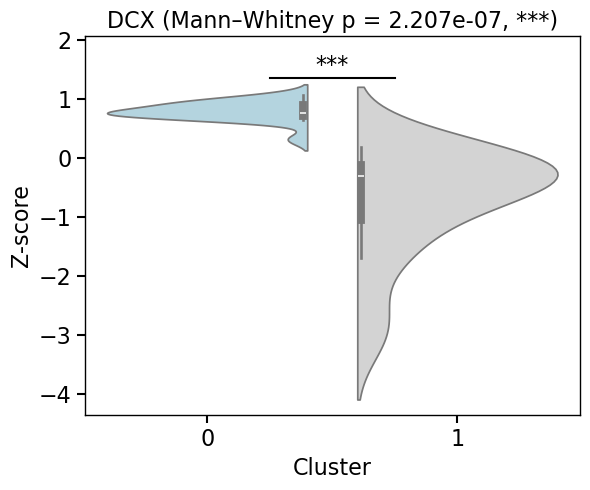

In [395]:
from scipy.stats import mannwhitneyu
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Create output folder
#output_dir = r"C:\Users\MunozestraJ\OneDrive - Cedars-Sinai Health System\Proteomics\Dox experiment\violin_plots"
#os.makedirs(output_dir, exist_ok=True)

# ✅ Define custom colors (do this outside the loop — one time)
custom_palette = {0: "lightblue", 1: "lightgray"}

# Loop through genes
for gene in df_long["Gene"].unique():
    plt.figure(figsize=(6, 5))

    # Subset data
    df_gene = df_long[df_long["Gene"] == gene]
    group0 = df_gene[df_gene["Cluster"] == 0]["Z_score"]
    group1 = df_gene[df_gene["Cluster"] == 1]["Z_score"]

    # Mann–Whitney U
    u_stat, p_val = mannwhitneyu(group0, group1, alternative='two-sided')

    # Significance stars
    if p_val < 0.001:
        sig = "***"
    elif p_val < 0.01:
        sig = "**"
    elif p_val < 0.05:
        sig = "*"
    else:
        sig = "ns"

    # ✅ Plot using your custom colors
    sns.violinplot(
        data=df_gene,
        x="Cluster",
        y="Z_score",
        hue="Cluster",
        split=True,
        palette=custom_palette,
        dodge=False
    )
    plt.legend().remove()
    
    # Style
    plt.title(f"{gene} (Mann–Whitney p = {p_val:.3e}, {sig})", fontsize=16)
    plt.xlabel("Cluster", fontsize=16)
    plt.ylabel("Z-score", fontsize=16)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    
    # Thicken axes lines
    ax = plt.gca()
    for spine in ax.spines.values():
        spine.set_linewidth(1)
    # Major ticks
    ax.tick_params(axis='both', which='major', labelsize=16, length=6, width=1.5)
    
    # Add significance annotation
    y_max = df_gene["Z_score"].max()
    plt.ylim(top=y_max + 1)
    plt.plot([0.25, 0.75], [y_max + 0.3]*2, lw=1.5, c='black')
    plt.text(0.5, y_max + 0.5, sig, ha='center', va='center', fontsize=16)

    # Save as SVG
    output_path = os.path.join(output_dir, f"{gene}_violin_cluster.svg")
    #plt.savefig(output_path, format="svg", bbox_inches="tight")
    plt.tight_layout()
    plt.show()

## For your volcano plot, you want to compare expression values (not Z-scores) between clusters.

## So:
## ❌ Don't use df_scaled_df or df_scaled_T for volcano
## ✅ Use the log-transformed, imputed, normalized data → df_imputed

In [396]:
# Already log-transformed, normalized, and imputed
df_expression = df_imputed

In [397]:
df_imputed

,A1_20250325224911,A2,A3,A4,A5,B1,B2,B3,B4,B5,...,G1,G2,G3,G4,G5,H1,H2,H3,H4,H5
Genes,,,,,,,,,,,,,,,,,,,,,
NUDT4B,3.478295,3.251143,3.838954,3.978689,3.474455,3.425196,3.329764,3.329549,3.460212,3.057519,...,2.982259,3.066533,2.724850,3.214157,2.776904,2.815768,2.944007,3.082509,2.688393,2.989593
NBPF1;NBPF10;NBPF19;NBPF20;NBPF8;NBPF9,-2.684477,-0.865426,-1.866441,-1.035435,-1.416031,-1.014876,-1.329022,-1.562287,-2.130855,-2.117660,...,-1.549403,-1.149945,-1.563083,-1.224390,-2.920489,-1.541161,-0.959638,-1.362937,-1.321831,-1.112683
GATD3;GATD3B,7.107018,7.222147,7.127621,7.357487,6.889319,6.918224,7.023297,7.002790,6.922326,7.040201,...,7.127687,7.044692,7.137284,7.169204,7.198967,7.159704,7.155875,7.181895,7.078209,7.268433
PIGBOS1,2.709374,2.918626,2.598493,3.083120,2.796669,2.676875,2.997169,3.295691,2.978316,3.177809,...,2.554844,3.081099,3.111594,3.231732,3.615512,2.986705,3.579899,3.369214,3.246753,3.241207
TMEM275,-0.869081,-0.979034,-0.612254,-0.919432,-1.643903,-1.365640,-1.449237,-1.504799,-1.369866,-0.904757,...,0.452527,0.312143,-0.066518,0.713549,0.231501,-0.338405,0.124995,-0.546644,0.034325,0.596932
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZHX2,3.910237,3.429563,4.246573,4.158149,2.881849,3.249332,3.307421,3.270368,3.567690,3.701379,...,2.254150,2.212568,2.425337,2.527309,2.323695,2.271511,2.189404,2.546830,2.213401,2.202034
MORC2,5.531458,5.572763,5.508386,5.605282,5.477315,5.588758,5.544409,5.542619,5.479473,5.399609,...,5.563243,5.510081,5.599229,5.617153,5.482991,5.564457,5.580057,5.539189,5.235994,5.532192
IVNS1ABP,5.378546,5.087632,5.445172,5.425206,4.690290,4.888884,4.947140,5.037825,5.024271,5.296423,...,4.492306,4.452886,4.435391,4.384496,4.402861,4.466769,4.352104,4.396035,3.833915,4.594719


In [398]:
sample_to_group = df_expression.columns.str[0]  # assumes sample names start with group letter

In [399]:
group1_labels = ['A', 'B', 'C', 'D']
group2_labels = ['E', 'F', 'G', 'H']

sample_groups = df_expression.columns.to_series().str[0]

group1_samples = sample_groups[sample_groups.isin(group1_labels)].index
group2_samples = sample_groups[sample_groups.isin(group2_labels)].index

In [400]:
group1 = df_expression[group1_samples]
group2 = df_expression[group2_samples]

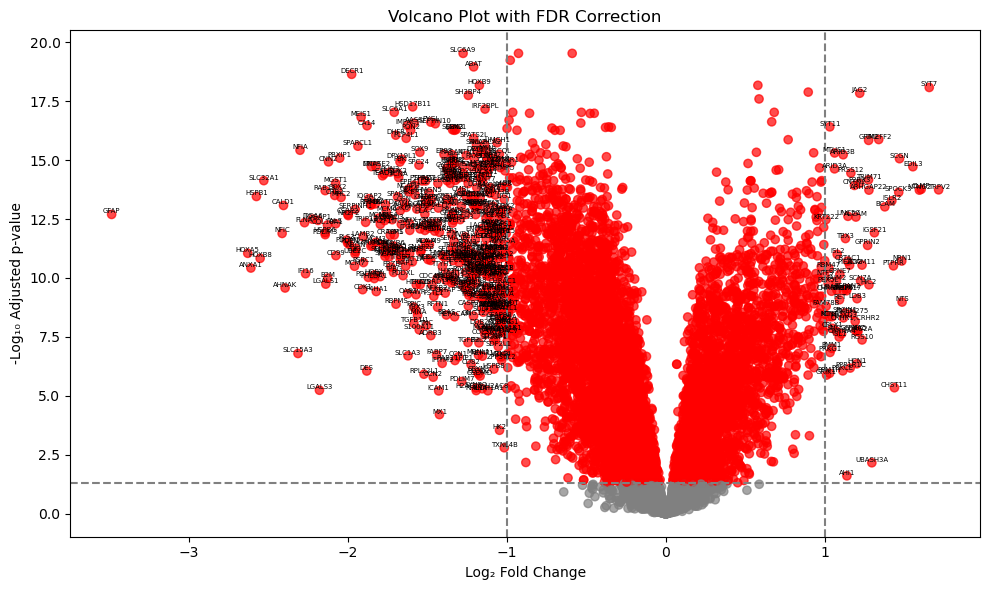

In [401]:
from scipy.stats import ttest_ind
import numpy as np
import pandas as pd
from statsmodels.stats.multitest import multipletests
import matplotlib.pyplot as plt

# Calculate means
mean_group1 = group1.mean(axis=1)
mean_group2 = group2.mean(axis=1)

# Log2 fold change (already log-transformed)
log2fc = mean_group2 - mean_group1

# t-test
pvals = ttest_ind(group2.T, group1.T, axis=0, equal_var=False).pvalue

# FDR correction (Benjamini-Hochberg)
rejected, pvals_corrected, _, _ = multipletests(pvals, alpha=0.05, method='fdr_bh')

# Create volcano dataframe
volcano_df = pd.DataFrame({
    "Gene": df_expression.index,
    "log2FC": log2fc,
    "pval": pvals,
    "pval_adj": pvals_corrected,
    "significant": rejected
})
volcano_df["neg_log10_pval"] = -np.log10(volcano_df["pval_adj"].clip(lower=1e-300))
volcano_df = volcano_df.replace([np.inf, -np.inf], np.nan).dropna()

# Volcano plot then I 
plt.figure(figsize=(10, 6))
plt.scatter(
    volcano_df["log2FC"],
    volcano_df["neg_log10_pval"],
    c=volcano_df["significant"].map({True: "red", False: "gray"}),
    alpha=0.7
)

# Label all genes with abs(log2FC) > 1 and FDR < 0.05
highlighted = volcano_df[(volcano_df["significant"]) & (volcano_df["log2FC"].abs() > 1)]

for _, row in highlighted.iterrows():
    plt.text(row["log2FC"], row["neg_log10_pval"], row["Gene"],
             fontsize=5, ha='center', va='bottom')

# Threshold lines
plt.axhline(-np.log10(0.05), linestyle='--', color='gray')
plt.axvline(1, linestyle='--', color='gray')
plt.axvline(-1, linestyle='--', color='gray')

plt.title("Volcano Plot with FDR Correction")
plt.xlabel("Log₂ Fold Change")
plt.ylabel("-Log₁₀ Adjusted p-value")
plt.tight_layout()
plt.show()

## log2fc = mean_group2 - mean_group1
##So:

##If log2FC > 0, the gene is higher in Group 2

##If log2FC < 0, it’s higher in Group 1

In [402]:
sig_genes_df = volcano_df[
    (volcano_df["pval_adj"] < 0.05) &
    (volcano_df["log2FC"].abs() > 1)
]

# Sort by most significant
sig_genes_df = sig_genes_df.sort_values("pval_adj")

# View top 10
print(sig_genes_df.head(10))

# Export all to Excel
sig_genes_df.to_excel("significant_genes_filtered.xlsx", index=False)

              Gene    log2FC          pval      pval_adj  significant  \
Genes                                                                   
SLC6A9      SLC6A9 -1.274133  5.472348e-24  2.970309e-20         True   
ABAT          ABAT -1.207709  5.689267e-23  1.113048e-19         True   
DECR1        DECR1 -1.974737  1.415051e-22  2.307004e-19         True   
HOXB9        HOXB9 -1.171830  5.504591e-22  6.730739e-19         True   
SYT7          SYT7  1.656053  7.655563e-22  8.320747e-19         True   
JAG2          JAG2  1.219087  1.643812e-21  1.461797e-18         True   
SH3BP4      SH3BP4 -1.241184  2.207560e-21  1.799529e-18         True   
HSD17B11  HSD17B11 -1.590924  7.934281e-21  5.543795e-18         True   
IRF2BPL    IRF2BPL -1.136386  1.051697e-20  6.858466e-18         True   
SLC6A1      SLC6A1 -1.707020  1.713480e-20  9.420471e-18         True   

          neg_log10_pval  
Genes                     
SLC6A9         19.527198  
ABAT           18.953486  
DECR1          

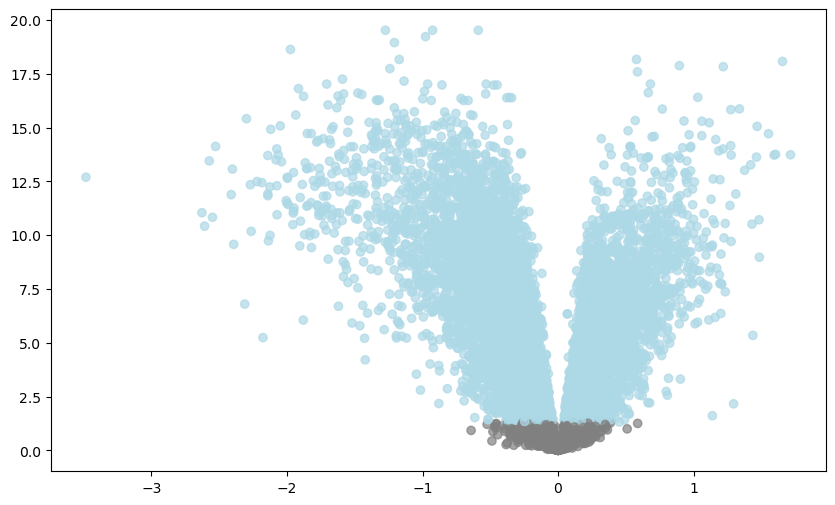

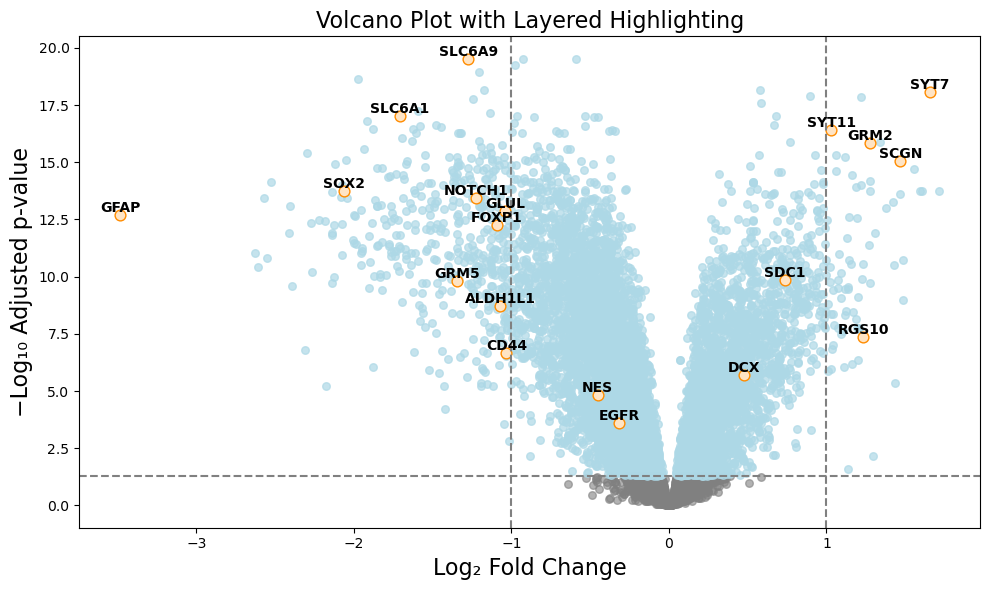

In [403]:
# Calculate means
mean_group1 = group1.mean(axis=1)
mean_group2 = group2.mean(axis=1)

# Log2 fold change (already log-transformed)
log2fc = mean_group2 - mean_group1

# t-test
pvals = ttest_ind(group2.T, group1.T, axis=0, equal_var=False).pvalue

# FDR correction (Benjamini-Hochberg)
rejected, pvals_corrected, _, _ = multipletests(pvals, alpha=0.05, method='fdr_bh')

# Create volcano dataframe
volcano_df = pd.DataFrame({
    "Gene": df_expression.index,
    "log2FC": log2fc,
    "pval": pvals,
    "pval_adj": pvals_corrected,
    "significant": rejected
})
volcano_df["neg_log10_pval"] = -np.log10(volcano_df["pval_adj"].clip(lower=1e-300))
volcano_df = volcano_df.replace([np.inf, -np.inf], np.nan).dropna()

# Volcano plot
plt.figure(figsize=(10, 6))
plt.scatter(
    volcano_df["log2FC"],
    volcano_df["neg_log10_pval"],
    c=volcano_df["significant"].map({True: "lightblue", False: "gray"}),
    alpha=0.7
)

# 🎯 Annotate specific genes of interest
genes_to_annotate = ["SOX2", "NES", "MIK67", "POU3F", "NOTCH1", "SLC6A9", "GFAP", "GRM2", "GRM5", "RGS10", "FOXP1", "CD44", "ALDH1L1", "SYT7", "GLUL", "SYT11", "SCGN", "SLC6A1", "SLC6A9" "NOTCH1", "DCX", "SDC1", "EGFR", "PHPR"]  # ← customize this

# 1. Not significant
df_gray = volcano_df[~volcano_df["significant"]]

# 2. Significant but not in your gene list
df_lightblue = volcano_df[
    (volcano_df["significant"]) & (~volcano_df["Gene"].isin(genes_to_annotate))
]

# 3. Highlighted genes (e.g., NES, TP53, etc.)
df_pink = volcano_df[volcano_df["Gene"].isin(genes_to_annotate)]

plt.figure(figsize=(10, 6))
ax = plt.gca()

# Plot gray first
ax.scatter(df_gray["log2FC"], df_gray["neg_log10_pval"],
           color="gray", alpha=0.6, s=30, label="Not significant")

# Plot lightblue next
ax.scatter(df_lightblue["log2FC"], df_lightblue["neg_log10_pval"],
           color="lightblue", alpha=0.7, s=30, label="Significant")

# Plot pink last (so it’s on top)
ax.scatter(df_pink["log2FC"], df_pink["neg_log10_pval"],
           color="bisque", edgecolor="darkorange", linewidth=1.0,
           s=60, label="Highlighted Genes")

for _, row in df_pink.iterrows():
    ax.text(row["log2FC"], row["neg_log10_pval"], row["Gene"],
            fontsize=10, ha='center', va='bottom', fontweight='bold', color='black')
plt.axhline(-np.log10(0.05), linestyle='--', color='gray')
plt.axvline(1, linestyle='--', color='gray')
plt.axvline(-1, linestyle='--', color='gray')

plt.xlabel("Log₂ Fold Change", fontsize=16)
plt.ylabel("−Log₁₀ Adjusted p-value", fontsize=16)
plt.title("Volcano Plot with Layered Highlighting", fontsize=16)
#plt.legend(frameon=True)
plt.tight_layout()
#plt.savefig(r"C:\Users\MunozestraJ\OneDrive - Cedars-Sinai Health System\Proteomics\Dox experiment\Volcano plot.svg", format="svg")
plt.show()

In [404]:
# 1. Filter volcano_df for significant DE genes
sig_genes_df = volcano_df[
    (volcano_df["pval_adj"] < 0.05) &
    (volcano_df["log2FC"].abs() > 1)
].copy()

# 2. Sort by adjusted p-value
sig_genes_df = sig_genes_df.sort_values("pval_adj")

# 3. (Optional) View top 10
print("Top significant genes:\n", sig_genes_df.head(10))

# 4. Export to Excel
output_path = r"C:\Users\MunozestraJ\OneDrive - Cedars-Sinai Health System\Proteomics\Dox experiment\sig_genes.xlsx"
#sig_genes_df.to_excel(output_path, index=False)
print(f"Exported to: {output_path}")

Top significant genes:
               Gene    log2FC          pval      pval_adj  significant  \
Genes                                                                   
SLC6A9      SLC6A9 -1.274133  5.472348e-24  2.970309e-20         True   
ABAT          ABAT -1.207709  5.689267e-23  1.113048e-19         True   
DECR1        DECR1 -1.974737  1.415051e-22  2.307004e-19         True   
HOXB9        HOXB9 -1.171830  5.504591e-22  6.730739e-19         True   
SYT7          SYT7  1.656053  7.655563e-22  8.320747e-19         True   
JAG2          JAG2  1.219087  1.643812e-21  1.461797e-18         True   
SH3BP4      SH3BP4 -1.241184  2.207560e-21  1.799529e-18         True   
HSD17B11  HSD17B11 -1.590924  7.934281e-21  5.543795e-18         True   
IRF2BPL    IRF2BPL -1.136386  1.051697e-20  6.858466e-18         True   
SLC6A1      SLC6A1 -1.707020  1.713480e-20  9.420471e-18         True   

          neg_log10_pval  
Genes                     
SLC6A9         19.527198  
ABAT           18.

In [405]:
#!pip install gprofiler-official

In [406]:
from gprofiler import GProfiler

# Get your gene list
gene_list = sig_genes_df["Gene"].tolist()

# Create gProfiler object
gp = GProfiler(return_dataframe=True)

# Run GO/pathway enrichment
results = gp.profile(
    organism="hsapiens",
    query=gene_list,
    user_threshold=0.05,
    sources=["GO:BP", "GO:MF", "GO:CC", "KEGG", "REAC", "WP"]
)

# Step 4: Check results
print(f"Submitted {len(gene_list)} genes.")

if results.empty:
    print("⚠️ No significant enrichment found. Try relaxing thresholds or using more genes.")
else:
    print("✅ Enrichment completed. Columns available:", results.columns.tolist())

    # Only show if 'term_name' exists
    if "term_name" in results.columns:
        print(results[["term_name", "p_value", "source"]].head(10))
    else:
        print("⚠️ 'term_name' column not found in results. Full results:")
        print(results.head())
    # Save results
    output_path = r"C:\Users\MunozestraJ\OneDrive - Cedars-Sinai Health System\Proteomics\Dox experiment\gprofiler_enrichment_results.xlsx"
    #results.to_excel(output_path, index=False)
    print(f"✅ Saved results to {output_path}")

ConnectTimeout: HTTPSConnectionPool(host='biit.cs.ut.ee', port=443): Max retries exceeded with url: /gprofiler/api/gost/profile/ (Caused by ConnectTimeoutError(<urllib3.connection.HTTPSConnection object at 0x0000026105A11E10>, 'Connection to biit.cs.ut.ee timed out. (connect timeout=None)'))

In [ ]:
print("Columns in results:", results.columns.tolist())
print(results.head())

In [ ]:
print(f"Number of enriched terms found: {results.shape[0]}")

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Make sure results aren't empty
if not results.empty and "name" in results.columns:
    # Step 1: Pick top N terms (you can change 10)
    top_terms = results.sort_values("p_value").head(10)

    # Step 2: Barplot of top pathways
    plt.figure(figsize=(8, 6))
    sns.barplot(
        y="name",
        x="-log10(p_value)",
        data=top_terms.assign(**{"-log10(p_value)": -np.log10(top_terms["p_value"])}),
        palette="viridis"
    )
    plt.title("Top 10 Enriched Pathways (g:Profiler)", fontsize=16)
    plt.xlabel("-Log₁₀ p-value", fontsize=14)
    plt.ylabel("Pathway", fontsize=14)
    plt.tight_layout()
    plt.show()
else:
    print("⚠️ No results to plot.")

In [ ]:
# Find the row for the pathway you care about
row = results[results["name"] == "cell junction"]

if not row.empty:
    print("Matched Genes:", row["intersection_size"].values[0])
else:
    print("⚠️ No pathway found with that exact name!")

# Show the genes (usually in 'intersection')
print(row["intersection_size"].values[0])

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Confirm 'results' is populated and has expected columns
if not results.empty and "name" in results.columns and "p_value" in results.columns:
    # Step 1: Compute -log10(p-value)
    results["log_p"] = -np.log10(results["p_value"])

    # Step 2: Get top 10 terms by significance
    top_terms = results.nsmallest(10, "p_value")

    # Step 3: Bubble plot
    plt.figure(figsize=(10, 8))
    sns.scatterplot(
        data=top_terms,
        x="intersection_size",   # Number of DEGs in each term
        y="name",                # GO term or pathway name
        size="intersection_size",
        hue="log_p",
        sizes=(100, 1000),
        palette="viridis",
        legend="brief"
    )

    plt.xlabel("Gene Count in Term", fontsize=12)
    plt.ylabel("Pathway / GO Term", fontsize=12)
    plt.title("Top Enriched Terms (Bubble Plot)", fontsize=14)
    plt.tight_layout()
    plt.show()
else:
    print("⚠️ No valid enrichment results found to plot.")

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# List of GO terms or pathway names you're interested in (case-insensitive match)
terms_of_interest = [
    "cell differentiation",
    "astrocyte differentiation",
    "nervous system development",
    "neurogenesis",
    "generation of neurons",
    "neuron differentiation",
    "cortical cytoskeleton organization",
    "synapse",
    "axon development",
    "gliogenesis", 
    "Neuroinflammation and glutamatergic signaling",
]

# --- 1. Prepare p-value for color scale ---
filtered_terms["p_value_capped"] = filtered_terms["p_value"].clip(lower=1e-10)  # avoid log(0)
filtered_terms["p_label"] = filtered_terms["p_value"].apply(lambda x: f"{x:.1e}")


# Sort to control y-axis order (optional)
filtered_terms = filtered_terms.sort_values("intersection_size", ascending=True).reset_index(drop=True)

# --- Calculate plot boundaries safely ---
max_x = filtered_terms["intersection_size"].max()
x_offset = max_x * 0.40  # shift p-values to the right by ~10%
x_buffer = max_x * 0.25  # add buffer to x-axis so text isn't cut off

# --- Set up plot ---
fig, ax = plt.subplots(figsize=(12, 8))


bubble = sns.scatterplot(
    data=filtered_terms,
    x="intersection_size",
    y="name",
    size="intersection_size",
    hue="p_value",
    palette="Blues_r",
    sizes=(200, 1200),
    alpha=0.8,
    edgecolor="gray",
    legend="brief",
    ax=ax
)

# --- Add p-value text BELOW bubble ---
for i, row in filtered_terms.iterrows():
    ax.text(
        row["intersection_size"],
        i - 0.5,  # further down
        row["p_label"],
        ha="left",
        va="top",
        fontsize=12,
        color="black"
    )

# --- Adjust font sizes ---
ax.set_yticks(range(len(filtered_terms)))
ax.set_yticklabels(filtered_terms["name"], fontsize=14)
ax.tick_params(axis='x', labelsize=12)

ax.set_xlabel("Gene Count in Term", fontsize=14)
ax.set_ylabel("GO Term", fontsize=14)
ax.set_title("Selected GO Terms (Enrichment Bubble Plot)", fontsize=16)

# --- Prevent clipping of bubbles or labels ---
ax.set_xlim(0, max_x + x_buffer)
ax.set_ylim(-1, len(filtered_terms) - 0.5)

# --- Fix legend position outside plot ---
sns.move_legend(bubble, "upper left", bbox_to_anchor=(1.02, 1), frameon=True)

# --- Improve layout ---
plt.grid(axis="x", linestyle="--", alpha=0.3)
plt.tight_layout(rect=[0, 0, 1, 1])  # leave space on right for legend

#plt.savefig(r"C:\Users\MunozestraJ\OneDrive - Cedars-Sinai Health System\Proteomics\Dox experiment\Enrichment Bubble Plot.svg", format="svg", bbox_inches="tight")
plt.show()

In [ ]:
# Example: Plot a single protein across conditions
proteins_of_interest = ["NES", "MAP2", "GFAP"]  # Replace with your protein

# Make sure your expression data is in long format

# Melt data for seaborn plotting
expr_long = df_imputed.loc[proteins_of_interest].T.reset_index().melt(id_vars="index", var_name="Protein", value_name="Expression")
expr_long.rename(columns={"index": "Sample"}, inplace=True)

# Add group info from sample names if encoded
expr_long["Group"] = expr_long["Sample"].str[0]  # Adjust if needed

# Plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=expr_long, x="Protein", y="Expression", hue="Group")
sns.stripplot(data=expr_long, x="Protein", y="Expression", hue="Group", dodge=True, color='black', size=4, alpha=0.5)
plt.title("Expression of Selected Proteins by Group")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# df_expression = df_imputed  # ⬅️ This was your imputed expression matrix df_imputed = df_expression  # If df_expression is already defined

In [ ]:
df_imputed = df_expression  # If df_expression is already defined

In [ ]:
df

In [ ]:
# Assuming your DataFrame is named 'df'
column_sums = df.sum(axis=0)  # Calculate the sum of each column

# Divide each element by the corresponding column sum
df_normalized = df.div(column_sums, axis=1)
df_normalized

In [ ]:
# Handle missing values (e.g., impute with mean or median), imputation may contain very small numbers
# Create a KNN imputer object
imputer = KNNImputer(n_neighbors=5)  # Adjust n_neighbors as needed

# Impute missing values using KNN
df_imputed = imputer.fit_transform(df_normalized)

# Create a new DataFrame with imputed values
df_imputed = pd.DataFrame(df_imputed, columns=df.columns, index= df.index)
df_imputed*10e6

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu
import os
import math

# --- Scale expression data ---
df_scaled = df_imputed * 1e7

# --- Assign groups from sample names ---
group1_labels = ['A', 'B', 'C', 'D']
group2_labels = ['E', 'F', 'G', 'H']
sample_to_group = df_scaled.columns.str[0]
group_map = sample_to_group.map(lambda x: 'Group 1' if x in group1_labels else ('Group 2' if x in group2_labels else 'Other'))

# --- Convert to long-form dataframe ---
df_long = df_scaled.T.copy()
df_long["Group"] = group_map.values
df_long = df_long.reset_index().melt(id_vars=["index", "Group"], var_name="Gene", value_name="Expression")
df_long.rename(columns={"index": "Sample"}, inplace=True)

# --- Genes of interest ---
genes_of_interest = ["STAT3", "ZEB2", "GFAP", "PLPP3", "SOX9", "NR3C1"]  # add more as needed
n_genes = len(genes_of_interest)

# --- Grid dimensions (2 columns) ---
n_cols = 2
n_rows = math.ceil(n_genes / n_cols)

# --- Set up the figure ---
fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 5 * n_rows), squeeze=False)

# --- Plot each gene in grid ---
for idx, gene in enumerate(genes_of_interest):
    row = idx // n_cols
    col = idx % n_cols
    ax = axes[row][col]

    df_gene = df_long[df_long["Gene"] == gene]
    group1 = df_gene[df_gene["Group"] == "Group 1"]["Expression"]
    group2 = df_gene[df_gene["Group"] == "Group 2"]["Expression"]

    # Mann–Whitney U test
    u_stat, p_val = mannwhitneyu(group1, group2, alternative="two-sided")
    sig = "***" if p_val < 0.001 else "**" if p_val < 0.01 else "*" if p_val < 0.05 else "ns"

    # Plot
    sns.violinplot(data=df_gene, x="Group", y="Expression", palette=["lightblue", "lightgray"], ax=ax, inner=None)
    sns.stripplot(data=df_gene, x="Group", y="Expression", color="black", size=4, jitter=True, alpha=0.6, ax=ax)

    # Significance annotation
    y_max = df_gene["Expression"].max()
    ax.set_ylim(top=y_max + 0.25 * y_max)
    ax.plot([0, 1], [y_max + 0.05 * y_max] * 2, lw=1.5, c="black")
    ax.text(0.5, y_max + 0.1 * y_max, sig, ha="center", va="center", fontsize=14)

    # Style
    ax.set_title(f"{gene} (p = {p_val:.2e}, {sig})", fontsize=13)
    ax.set_xlabel("")
    ax.set_ylabel("Expression", fontsize=12)
    ax.tick_params(axis="both", labelsize=11)

# --- Hide unused subplots if total isn't a full grid ---
for i in range(n_genes, n_rows * n_cols):
    fig.delaxes(axes[i // n_cols][i % n_cols])

# --- Final layout and export ---
plt.tight_layout()
output_path = r"C:\Users\MunozestraJ\OneDrive - Cedars-Sinai Health System\Proteomics\Dox experiment\violin_plots\multi_gene_violin_grid.svg"
#plt.savefig(output_path, format="svg", bbox_inches="tight")
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu

# --- List of genes to analyze ---
genes_of_interest = ["STAT3", "ZEB2", "GFAP", "SOX9", "NR3C1", "NOTCH1", "QKI", "SYN1", "DLG4", "SLC17A7", "SLC17A6", "CCNE1", "CCNA2", "DCX", "EGFR", "SDC1", "SOX2", "PRPH"]  # customize as needed

# --- Setup for results ---
results = []

for gene in genes_of_interest:
    group1 = df_scaled.loc[gene, df_scaled.columns.str[0].isin(['A', 'B', 'C', 'D'])]
    group2 = df_scaled.loc[gene, df_scaled.columns.str[0].isin(['E', 'F', 'G', 'H'])]

    # Compute log2 fold change
    fc = group1.mean() / group2.mean()
    log2fc = np.log2(fc)

    # Mann–Whitney U test
    u_stat, p_val = mannwhitneyu(group1, group2, alternative='two-sided')

    # Significance label
    if p_val < 0.001:
        sig = '***'
    elif p_val < 0.01:
        sig = '**'
    elif p_val < 0.05:
        sig = '*'
    else:
        sig = 'ns'

    # Collect
    results.append({"Gene": gene, "log2FC": log2fc, "pval": p_val, "sig": sig})

# --- Convert to DataFrame ---
fc_df = pd.DataFrame(results)

# --- Plot ---
plt.figure(figsize=(10, 6))
sns.barplot(data=fc_df, x="Gene", y="log2FC", color="lightblue", edgecolor="gray")

# Add significance stars above bars
for i, row in fc_df.iterrows():
    y = row["log2FC"]
    offset = 0.05 * np.max(np.abs(fc_df["log2FC"]))
    plt.text(i, y + np.sign(y) * offset, row["sig"], ha='center', va='bottom' if y >= 0 else 'top', fontsize=14)

# Style
plt.axhline(0, color="black", lw=1)
plt.ylabel("log₂ Fold Change (Group1 / Group2)", fontsize=13)
plt.xlabel("")
plt.title("Fold Change Between Groups with Expression Significance", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

# Expand y-limits so stars fit
y_max = fc_df["log2FC"].max()
y_min = fc_df["log2FC"].min()
y_range = y_max - y_min
plt.ylim(y_min - 0.2 * y_range, y_max + 0.2 * y_range)

output_path = r"C:\Users\MunozestraJ\OneDrive - Cedars-Sinai Health System\Proteomics\Dox experiment\foldchange astrocytes differentiation.svg"
#plt.savefig(output_path, format="svg", bbox_inches="tight")

plt.show()

In [ ]:
# Display sorted fold change table
print(fc_df.sort_values("log2FC", ascending=False))

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu

# --- List of genes to analyze ---
#genes_of_interest = ["SLC6A9", "GRM2", "PSAT1", "SHMT1", "GLUL", "GRM5", "SLC1A3", "GRIK1"]  # customize as needed
genes_of_interest = ["STAT3", "ZEB2", "GFAP", "SOX9", "NR3C1", "NOTCH1", "QKI"]
# --- Setup for results ---
results = []

for gene in genes_of_interest:
    group1 = df_scaled.loc[gene, df_scaled.columns.str[0].isin(['A', 'B', 'C', 'D'])]
    group2 = df_scaled.loc[gene, df_scaled.columns.str[0].isin(['E', 'F', 'G', 'H'])]

    # Compute log2 fold change
    fc = group2.mean() / group1.mean()
    log2fc = np.log2(fc)

    # Mann–Whitney U test
    u_stat, p_val = mannwhitneyu(group1, group2, alternative='two-sided')

    # Significance label
    if p_val < 0.001:
        sig = '***'
    elif p_val < 0.01:
        sig = '**'
    elif p_val < 0.05:
        sig = '*'
    else:
        sig = 'ns'

    # Collect
    results.append({"Gene": gene, "log2FC": log2fc, "pval": p_val, "sig": sig})

# --- Convert to DataFrame ---
fc_df = pd.DataFrame(results)

# --- Prepare plot ---
plt.figure(figsize=(10, 6))

# Sort genes by fold change for visual clarity
fc_df_sorted = fc_df.sort_values("log2FC", ascending=False).reset_index(drop=True)

# Plot dots (log2FC on y-axis)
sns.stripplot(
    data=fc_df_sorted,
    x="log2FC",
    y="Gene",
    size=10,
    color="lightblue",
    edgecolor="orange",
)

# Add vertical line at 0 (no change)
plt.axvline(0, color="black", lw=1)

# Add significance stars next to dots
x_range = fc_df_sorted["log2FC"].max() - fc_df_sorted["log2FC"].min()
x_offset = 0.03 * x_range  # offset stars slightly to the right

for i, row in fc_df_sorted.iterrows():
    x = row["log2FC"]
    y = i
    plt.text(
        x + x_offset,
        y,
        row["sig"],
        va="center",
        ha="left",
        fontsize=13,
        color="black"
    )

# Style
plt.xlabel("log₂ Fold Change (Group1 / Group2)", fontsize=13)
plt.ylabel("")
plt.title("Fold Change by Gene with Significance", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# --- Protein list to plot ---
proteins_of_interest = ["STAT3", "ZEB2", "GFAP", "PLPP3", "SOX9", "NR3C1"]  # Update as needed

# --- Melt expression data ---
expr_long = df_imputed.loc[proteins_of_interest].T.reset_index().melt(
    id_vars="index", var_name="Protein", value_name="Expression"
)
expr_long.rename(columns={"index": "Sample"}, inplace=True)

# --- Assign groups using first letter of sample name ---
expr_long["Group"] = expr_long["Sample"].str[0]

# --- Plot: One violin plot per protein ---
plt.figure(figsize=(12, 6 * len(proteins_of_interest)))

for i, protein in enumerate(proteins_of_interest):
    plt.subplot(len(proteins_of_interest), 1, i + 1)

    # Subset data for this protein
    data = expr_long[expr_long["Protein"] == protein]

    # Group split
    group_values = [g["Expression"].values for _, g in data.groupby("Group")]
    if len(group_values) == 2:
        stat, pval = ttest_ind(*group_values)
    else:
        pval = float('nan')

    # Determine significance label
    if pval < 0.001:
        sig_label = "***"
    elif pval < 0.01:
        sig_label = "**"
    elif pval < 0.05:
        sig_label = "*"
    else:
        sig_label = "ns"

    # Plot violin and strip
    sns.violinplot(data=data, x="Group", y="Expression", inner=None, palette="pastel")
    sns.stripplot(data=data, x="Group", y="Expression", color="black", size=4, alpha=0.6)

    # Annotate significance
    y_max = data["Expression"].max()
    y_min = data["Expression"].min()
    y_range = y_max - y_min
    plt.text(0.5, y_max + 0.05 * y_range, sig_label, ha="center", fontsize=14)

    # Titles and labels
    plt.title(f"{protein} (p = {pval:.2e})")
    plt.xlabel("Condition")
    plt.ylabel("Expression")

plt.tight_layout()
plt.show()